# Connect GDrive and import libraries

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
!pip install pingouin 
!pip install statsmodels
!pip install pyreadstat 
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 7.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=25f063b644ee5463a24f68e36639fa97f263bfbe7090cbe0f85137aa51fee296
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=77107a6052bfb25f96483e047c4b4aea89a27430b17431f95df71994fa85d702
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pingouin as pg
import pyreadstat
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.offline as pyo 
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import scipy.special
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

---

# INDEX!

In [6]:
#Se podria usar Merge
# para estandariazar variables df.P6087=df.P6087.replace('',np.nan).astype(float)
#FINAL, _ = pyreadstat.read_dta('/content/gdrive/MyDrive/DS4A Project - Team 148/Proyecto/BASE_FINAL_YEARS.dta')
df, _ = pyreadstat.read_dta('/content/gdrive/MyDrive/DS4A Project - Team 148/Proyecto/BASE_FINAL_YEARS.dta')
df.head()

DIRECTORIO  SECUENCIA_P  ORDEN       FEX_C  P6020  P6040  P6051  P5502  \
0   7000000.0          1.0    1.0  384.328169    2.0   64.0    1.0    4.0   
1   7000002.0          1.0    1.0  274.640130    2.0   78.0    1.0    6.0   
2   7000002.0          1.0    2.0  274.640130    1.0   84.0    2.0    6.0   
3   7000003.0          1.0    1.0  125.253015    2.0   61.0    1.0    4.0   
4   7000014.0          1.0    1.0    8.607258    1.0   71.0    1.0    6.0   

  P6087 P6088  ...  P5661S2  P5661S3  P5661S4  P5661S9  P5661S7    YEAR  \
0    10     4  ...      3.0      3.0      2.0      1.0      3.0  2018.0   
1     2     2  ...      1.0      1.0      1.0      1.0      3.0  2018.0   
2    10    10  ...      1.0      1.0      1.0      1.0      3.0  2018.0   
3     2     2  ...      1.0      4.0      2.0      1.0      2.0  2018.0   
4     9     1  ...      1.0      3.0      3.0      4.0      4.0  2018.0   

   P3008  P3175  P753S1  P753S2  
0    NaN    NaN     NaN     NaN  
1    NaN    NaN     NaN     NaN  
2    NaN    NaN     NaN     NaN  
3    NaN    NaN     NaN     NaN  
4    NaN    NaN     NaN     NaN  

[5 rows x 92 columns]

## 1. Dimension Household_composition:

In [7]:
#P6051 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6051={
1:1,2:1,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,np.nan:0}
df.P6051.dtype
df.P6051=df.P6051.replace(dic_P6051)
df.P6051.unique()

array([1., 0.])

In [8]:
#P5502 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5502={
1:0,2:0,3:1,4:1,5:1,6:0,np.nan:0}
df.P5502.dtype
df.P5502=df.P5502.replace(dic_P5502).astype(int)
df.P5502.unique()

array([1, 0])

In [9]:
#P6087 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6087={
1:1,2:1,3:1,4:0,5:0,6:0,7:0,8:0,9:1,10:1,np.nan:0}
df.P6087.dtype
df.P6087=df.P6087.replace('',np.nan).astype(float)
df.P6087=df.P6087.replace(dic_P6087)
df.P6087.unique()

array([1., 0.])

In [10]:
#P6088 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6088={
1:1,2:1,3:1,4:0,5:0,6:0,7:0,8:0,9:1,10:1,np.nan:0}
df.P6088.dtype
df.P6088=df.P6088.replace('',np.nan).astype(float)
df.P6088=df.P6088.replace(dic_P6088).astype(int)
df.P6088.unique()

array([0, 1])

In [11]:
#P6080 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6080={
1:1,2:1,3:1,4:1,5:1,6:0,np.nan:0}
df.P6080.dtype
df.P6080=df.P6080.replace(dic_P6080)
df.P6080.unique()

array([0., 1.])

In [12]:
#P1895 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1895={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1895.dtype
df.P1895
df.P1895=df.P1895.replace(dic_P1895)
df.P1895.unique()

array([0. , 0.9, 0.2, 0.4, 0.5, 0.1, 0.3, 1. , 0.7, 0.8, 0.6])

In [13]:
#P1896 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1896={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1896.dtype
df.P1896
df.P1896=df.P1896.replace(dic_P1896)
df.P1896.unique()

array([0.6, 0.1, 0.2, 0.3, 0.7, 0.5, 0.4, 0. , 0.8, 0.9, 1. ])

In [14]:
#P1897 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1897={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1897.dtype
df.P1897
df.P1897=df.P1896.replace(dic_P1897)
df.P1897.unique() 

array([0.6, 0.1, 0.2, 0.3, 0.7, 0.5, 0.4, 1. , 0.8, 0.9])

In [15]:
#P1898 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1898={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1898.dtype
df.P1898
df.P1898=df.P1898.replace(dic_P1898)
df.P1898.unique()

array([0.6, 0. , 0.5, 0.7, 0.2, 0.4, 0.1, 0.3, 0.9, 1. , 0.8])

In [16]:
#P1899 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1899={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1899.dtype
df.P1899
df.P1899=df.P1899.replace(dic_P1899)
df.P1899.unique()

array([0.2, 0. , 0.7, 0.3, 0.6, 0.5, 0.1, 1. , 0.8, 0.4, 0.9])

In [17]:
#P1927remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1927={
0:1,1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4,7:0.3,8:0.2,9:0.1,10:0,99:0,np.nan:0}
df.P1927.dtype
df.P1927
df.P1927=df.P1927.replace(dic_P1927)
df.P1927.unique()

array([0.1, 0.9, 0.2, 0.5, 0.6, 0.4, 0. , 0.3, 0.8, 1. , 0.7])

In [18]:
df["Household_composition"] =df[["P6051","P5502","P6087","P6088","P6080", "P1895","P1896","P1897","P1898","P1899","P1927"]].sum(axis=1)
df.Household_composition=df.Household_composition*0.0113636
df.Household_composition.describe()

count    153792.000000
mean          0.059926
std           0.013199
min           0.005682
25%           0.051136
50%           0.059091
75%           0.068182
max           0.123863
Name: Household_composition, dtype: float64

## 2. Dimension Living_place

In [19]:
#CLASE remplazar por 0 y 1  (1 son privados 0 no privados)
dic_CLASE={
1:0,2:1,np.nan:0
}
df.CLASE.dtype
df.CLASE=df.CLASE.replace(dic_CLASE)
df.CLASE.unique()

array([0., 1.])

In [20]:
#P1070 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1070={
1:0,2:0,3:0,4:0,5:1,np.nan:0
}
df.P1070.dtype
df.P1070 = df.P1070.replace(dic_P1070)
df.P1070.unique()

array([0., 1.])

In [21]:
#P4005 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P4005={
1:0,2:1,3:1,4:1,5:1,6:0,7:1,8:1,9:1,10:0,np.nan:0
}
df.P4005.dtype
df.P4005=df.P4005.replace(dic_P4005)
df.P4005.unique()

array([0., 1.])

In [22]:
#P4015 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P4015={
1:0,2:0,3:0,4:0,5:1,6:1,7:1,np.nan:0
}
df.P4015.dtype
df.P4015=df.P4015.replace(dic_P4015)
df.P4015.unique()

array([1., 0.])

In [23]:
#P4567 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P4567={
1:0,2:0,3:1,4:1,5:1,6:1,7:1,np.nan:0
}
df.P4567.dtype
df.P4567=df.P4567.replace(dic_P4567)
df.P4567.unique()

array([1., 0.])

In [24]:
#P8520S1 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P8520S1={
1:0,2:1,np.nan:0
}
df.P8520S1.dtype
df.P8520S1=df.P8520S1.replace(dic_P8520S1)
df.P8520S1.unique()

array([0., 1.])

In [25]:
#P8520S5 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P8520S5={
1:0,2:1,np.nan:0
}
df.P8520S5.dtype
df.P8520S5=df.P8520S5.replace(dic_P8520S5)
df.P8520S5.unique()

array([0., 1.])

In [26]:
#P4065S_  si la vivienda fue afectada por al menos 1 de los desastres en las preguntas P4065S1,PP4065S2,PP4065S3,,PP4065S4
dic_P4065S_={
1:1,2:0,np.nan:0
}
df.P4065S1.dtype
df.P4065S1=df.P4065S1.replace(dic_P4065S_)
df.P4065S2=df.P4065S2.replace(dic_P4065S_)
df.P4065S3=df.P4065S3.replace(dic_P4065S_)
df.P4065S4=df.P4065S4.replace(dic_P4065S_)
df["P4065S_"] =df[["P4065S1","P4065S2","P4065S3","P4065S4"]].sum(axis=1)
df.P4065S_=df.P4065S_.replace({
0:0,1:1,2:1,3:1,4:1
})
df.P4065S_.unique()

array([0., 1.])

In [27]:
#P5661S2remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5661S2={
1:0,2:0.25,3:0.75,4:1,np.nan:0
}
df.P5661S2.dtype
df.P5661S2=df.P5661S2.replace(dic_P5661S2)
df.P5661S2.unique()

array([0.75, 0.  , 0.25, 1.  ])

In [28]:
#P5661S3remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5661S3={
1:0,2:0.25,3:0.75,4:1,np.nan:0
}
df.P5661S3.dtype
df.P5661S3=df.P5661S3.replace(dic_P5661S3)
df.P5661S3.unique()

array([0.75, 0.  , 1.  , 0.25])

In [29]:
#P5661S4 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5661S4={
1:0,2:0.25,3:0.75,4:1,np.nan:0
}
df.P5661S4.dtype
df.P5661S4=df.P5661S4.replace(dic_P5661S4)
df.P5661S4.unique()

array([0.25, 0.  , 0.75, 1.  ])

In [30]:
#P5661S9 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5661S9={
1:0,2:0.25,3:0.75,4:1,np.nan:0
}
df.P5661S9.dtype
df.P5661S9=df.P5661S9.replace(dic_P5661S9)
df.P5661S9.unique()

array([0.  , 1.  , 0.25, 0.75])

In [31]:
#P5661S7 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5661S7={
1:0,2:0.25,3:0.75,4:1,np.nan:0
}
df.P5661S7.dtype
df.P5661S7=df.P5661S7.replace(dic_P5661S7)
df.P5661S7.unique()

array([0.75, 0.25, 1.  , 0.  ])

In [32]:
df["Living_place"] =df[["CLASE","P1070","P4005","P4015","P4567","P8520S1","P8520S5","P4065S_","P5661S2","P5661S3","P5661S4","P5661S9",
              "P5661S7"]].sum(axis=1)
df.Living_place=df.Living_place*0.0096154
df.Living_place.describe()

count    153792.000000
mean          0.029570
std           0.019112
min           0.000000
25%           0.014423
50%           0.028846
75%           0.040865
max           0.125000
Name: Living_place, dtype: float64

## 3. Dimension Education

In [33]:
#P6160 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6160={
1:0,2:1,np.nan:0
}
df.P6160.dtype
df.P6160=df.P6160.replace(dic_P6160)
df.P6160.unique()

array([0., 1.])

In [34]:
#P8587 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P8587={
1:1,2:1,3:1,4:1,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0, np.nan :0
}
df.P8587.dtype
df.P8587=df.P8587.replace('',np.nan).astype(float)
df.P8587=df.P8587.replace(dic_P8587)
df.P8587.unique()

array([0., 1.])

In [35]:
df["Education"]=df[["P6160","P8587"]].sum(axis=1)
df.Education=df.Education*0.0625
df.Education.describe()

count    153792.000000
mean          0.063384
std           0.038722
min           0.000000
25%           0.062500
50%           0.062500
75%           0.062500
max           0.125000
Name: Education, dtype: float64

## 4. Dimension Work_force

In [36]:
#P6240 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6240={
1:0,2:1,3:0,4:0,5:1,6:0,np.nan:0}
df.P6240.dtype
df.P6240=df.P6240.replace(dic_P6240)
df.P6240.unique()

array([0., 1.])

In [37]:
#P6270 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6270={
1:1,2:0,np.nan:0}
df.P6270.dtype
df.P6270=df.P6270.replace('',np.nan).astype(float)
df.P6270=df.P6270.replace(dic_P6270)
df.P6270.unique()

array([0., 1.])

In [38]:
#P6440 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6440={
1:0,2:1,np.nan:0}
df.P6440.dtype
df.P6440=df.P6440.replace('',np.nan).astype(float)
df.P6440=df.P6440.replace(dic_P6440)
df.P6440.unique()

array([1., 0.])

In [39]:
#P8622 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P8622={
1:0,2:1,3:0,np.nan:0}
df.P8622.dtype
df.P8622=df.P8622.replace('',np.nan).astype(float)
df.P8622=df.P8622.replace(dic_P8622)
df.P8622.unique()

array([0., 1.])

In [40]:
#VTOTAL1 suma de los ingresos
df.P8624=df.P8624.replace('',np.nan).astype(float)
df.P8642S1=df.P8642S1.replace('',np.nan).astype(float)
df.P8644S1=df.P8644S1.replace('',np.nan).astype(float)
df.P8646S1=df.P8646S1.replace('',np.nan).astype(float)
df["VTOTAL1"] =df[["P8624","P8642S1","P8644S1","P8646S1"]].sum(axis=1)
#aplly
def assign_label(value):
    """Assign labels to country and year pairs according to their recorded exports
    """
    if value <= 800000:
        label = 1
    else:
        label = 0
    return label

df["VTOTAL1"]=df["VTOTAL1"].apply(assign_label)
df.VTOTAL1.unique()

array([1, 0])

In [41]:
#P415 remplazar por 0 y 1  (1 son privados 0 no privados)
def assign_label2(value):
    """Assign labels to country and year pairs according to their recorded exports
    """
    if value <= 48:
        label = 0
    else:
        label = 1
    return label
df.P415=df.P415.replace('',np.nan).astype(float)
df["P415"]=df["P415"].apply(assign_label2)
df.P415.dtype
df.P415.unique()

array([0, 1])

In [42]:
#P6920 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6920={
1:0,2:1,3:0,np.nan:0}
df.P6920.dtype
df.P6920=df.P6920.replace(dic_P6920)
df.P6920.unique()

array([1., 0.])

In [43]:
df["Work_force"]=df[["P6240","P6270","P6440","P8622","VTOTAL1","P415","P6920"]].sum(axis=1)
df.Work_force=df.Work_force*0.01785714286
df.Work_force.describe()

count    153792.000000
mean          0.049533
std           0.016172
min           0.000000
25%           0.035714
50%           0.053571
75%           0.053571
max           0.089286
Name: Work_force, dtype: float64

## 5. Dimension Health

In [44]:
#P6090 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6090={
1:0,2:1,9:0,np.nan:0}
df.P6090.dtype
df.P6090=df.P6090.replace(dic_P6090)
df.P6090.unique()

array([0., 1.])

In [45]:
#P6100 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6100={
1:0,2:0,3:1,9:0,np.nan:0}
df.P6100=df.P6100.replace('',np.nan).astype(float)
df.P6100.dtype
df.P6100=df.P6100.replace(dic_P6100)
df.P6100.unique()

array([0., 1.])

In [46]:
#P6127 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6127={
1:0,2:0,3:1,4:1,np.nan:0}
df.P6127.dtype
df.P6127=df.P6127.replace(dic_P6127)
df.P6127.unique()

array([1., 0.])

In [47]:
#P1930 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1930={
1:1,2:0,np.nan:0}
df.P1930.dtype
df.P1930=df.P1930.replace(dic_P1930)
df.P1930.unique()

array([1., 0.])

In [48]:
#P1930S1 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1930S1={
1:0,2:1,np.nan:0}
df.P1930S1.dtype
df.P1930S1=df.P1930S1.replace('',np.nan).astype(float)
df.P1930S1=df.P1930S1.replace(dic_P1930S1)
df.P1930S1.unique()

array([0., 1.])

In [49]:
#P1906S1 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S1={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S1.dtype
df.P1906S1=df.P1906S1.replace(dic_P1906S1)
df.P1906S1.unique()

array([0.  , 0.25, 0.75, 1.  ])

In [50]:
#P1906S2 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S2={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S2.dtype
df.P1906S2=df.P1906S2.replace(dic_P1906S2)
df.P1906S2.unique()

array([0.  , 0.75, 0.25, 1.  ])

In [51]:
#P1906S3 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S3={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S3.dtype
df.P1906S3=df.P1906S3.replace(dic_P1906S3)
df.P1906S3.unique()

array([0.25, 1.  , 0.  , 0.75])

In [52]:
#P1906S4 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S4={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S4.dtype
df.P1906S4=df.P1906S4.replace(dic_P1906S4)
df.P1906S4.unique()

array([0.25, 1.  , 0.  , 0.75])

In [53]:
#P1906S5 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S5={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S5.dtype
df.P1906S5=df.P1906S5.replace(dic_P1906S5)
df.P1906S5.unique()

array([0.25, 0.  , 1.  , 0.75])

In [54]:
#P1906S6 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S6={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S6.dtype
df.P1906S6=df.P1906S6.replace(dic_P1906S6)
df.P1906S6.unique()

array([0.25, 0.  , 0.75, 1.  ])

In [55]:
#P1906S7 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1906S7={
1:1,2:0.75,3:0.25,4:0,np.nan:0}
df.P1906S7.dtype
df.P1906S7=df.P1906S7.replace(dic_P1906S7)
df.P1906S7.unique()

array([0.  , 1.  , 0.25, 0.75])

In [56]:
#P1707 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1707={
1:1,2:0,np.nan:0}
df.P1707.dtype
df.P1707=df.P1707.replace(dic_P1707)
df.P1707.unique()

array([1., 0.])

In [57]:
#P6133 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P6133={
1:1,2:0,np.nan:0}
df.P6133.dtype
df.P6133=df.P6133.replace(dic_P6133)
df.P6133.unique()

array([1., 0.])

In [58]:
df["Health"]=df[["P6090","P6100","P6127","P1930","P1930S1","P1906S1","P1906S2","P1906S3","P1906S4","P1906S5","P1906S6","P1906S7",
              "P1707","P6133"]].sum(axis=1)
df.Health=df.Health*0.0089286
df.Health.describe()

count    153792.000000
mean          0.022271
std           0.013847
min           0.000000
25%           0.011161
50%           0.020089
75%           0.029018
max           0.107143
Name: Health, dtype: float64

## 6. Dimension Home_Services

In [59]:
#P5666 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5666={
1:0,2:1,np.nan:0}
df.P5666.dtype
df.P5666=df.P5666.replace(dic_P5666)
df.P5666.unique()

array([0., 1.])

In [60]:
#P5022 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5022={
1:0,2:1,np.nan:0}
df.P5022.dtype
df.P5022=df.P5022.replace('',np.nan).astype(float)
df.P5022=df.P5022.replace(dic_P5022)
df.P5022.unique()

array([0., 1.])

In [61]:
#P5041 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5041={
1:0,2:1,3:1,4:1,5:1,6:1,np.nan:0}
df.P5041.dtype
df.P5041=df.P5041.replace(dic_P5041)
df.P5041.unique()

array([0., 1.])

In [62]:
#P5047 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5047={
1:0,2:1,np.nan:0}
df.P5047.dtype
df.P5047=df.P5047.replace('',np.nan).astype(float)
df.P5047=df.P5047.replace(dic_P5047)
df.P5047.unique()

array([0., 1.])

In [63]:
#P5069 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5069={
1:0,2:1,3:1,4:1,5:1,6:1,np.nan:0}
df.P5069.dtype
df.P5069=df.P5069.replace(dic_P5069)
df.P5069.unique()

array([1., 0.])

In [64]:
#P8536 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P8536={
1:0,2:0,3:1,4:0,5:1,6:1,7:1,8:1,np.nan:0}
df.P8536.dtype
df.P8536=df.P8536.replace('',np.nan).astype(float)
df.P8536=df.P8536.replace(dic_P8536)
df.P8536.unique()

array([0., 1.])

In [65]:
df["Home_Services"]=df[["P5666","P5022","P5041","P5047","P5069","P8536"]].sum(axis=1)
df.Home_Services=df.Home_Services*0.0208333
df.Home_Services.describe()

count    153792.000000
mean          0.044424
std           0.030551
min           0.000000
25%           0.020833
50%           0.041667
75%           0.062500
max           0.125000
Name: Home_Services, dtype: float64

## 7. Dimension Technology

In [66]:
#P1910 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1910={
1:0,2:0.25,3:0.50,4:0.75,5:1,np.nan:0}
df.P1910.dtype
df.P1910=df.P1910.replace(dic_P1910)
df.P1910.unique()

array([1.  , 0.  , 0.25, 0.5 , 0.75])

In [67]:
#P1911 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1911={
1:0,2:0.25,3:0.50,4:0.75,5:1,np.nan:0}
df.P1911.dtype
df.P1911=df.P1911.replace(dic_P1911)
df.P1911.unique()

array([1.  , 0.  , 0.25, 0.5 , 0.75])

In [68]:
#P1912 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1912={
1:0,2:0.25,3:0.50,4:0.75,5:1,np.nan:0}
df.P1912.dtype
df.P1912=df.P1912.replace(dic_P1912)
df.P1912.unique()

array([0.  , 1.  , 0.25, 0.75, 0.5 ])

In [69]:
#P1082 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1082={
1:0,2:1,np.nan:0}
df.P1082.dtype
df.P1082=df.P1082.replace(dic_P1082)
df.P1082.unique()

array([0., 1.])

In [70]:
df["Technology"]=df[["P1910","P1911","P1912","P1082"]].sum(axis=1)
df.Technology=df.Technology*0.0312500
df.Technology.describe()

count    153792.000000
mean          0.100139
std           0.018900
min           0.000000
25%           0.093750
50%           0.093750
75%           0.125000
max           0.125000
Name: Technology, dtype: float64

## 8. Dimension Life_conditions


In [71]:
#P9010 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P9010={
1:0,2:1,np.nan:0}
df.P9010.dtype
df.P9010=df.P9010.replace(dic_P9010)
df.P9010.unique()

array([1., 0.])

In [72]:
#P9025S1 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P9025S1={
1:0,2:1,np.nan:0}
df.P9025S1.dtype
df.P9025S1=df.P9025S1.replace(dic_P9025S1)
df.P9025S1.unique()

array([0., 1.])

In [73]:
#P9025S2 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P9025S2={
1:1,2:0,np.nan:0}
df.P9025S2.dtype
df.P9025S2=df.P9025S2.replace(dic_P9025S2)
df.P9025S2.unique()

array([1., 0.])

In [74]:
#P5230 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5230={
1:1,2:0,np.nan:0}
df.P5230.dtype
df.P5230=df.P5230.replace(dic_P5230)
df.P5230.unique()

array([0., 1.])

In [75]:
#P9090 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P9090={
1:1,2:0,3:0,np.nan:0}
df.P9090.dtype
df.P9090=df.P9090.replace(dic_P9090)
df.P9090.unique()

array([1., 0.])

In [76]:
#P784S1 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P784S1={
1:1,2:0,np.nan:0}
df.P784S1.dtype
df.P784S1=df.P784S1.replace(dic_P784S1)
df.P784S1.unique()

array([0., 1.])

In [77]:
#P784S2 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P784S2={
1:1,2:0,np.nan:0}
df.P784S2.dtype
df.P784S2=df.P784S2.replace(dic_P784S2)
df.P784S2.unique()

array([0., 1.])

In [78]:
#P1075 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P1075={
1:0,2:1,np.nan:0}
df.P1075.dtype
df.P1075=df.P1075.replace(dic_P1075)
df.P1075.unique()

array([0., 1.])

In [79]:
#P5095 remplazar por 0 y 1  (1 son privados 0 no privados)
dic_P5095={
1:0,2:0,3:1,4:0,5:0,6:0,np.nan:0}
df.P5095.dtype
df.P5095=df.P5095.replace(dic_P5095)
df.P5095.unique()

array([0., 1.])

In [80]:
df["Life_conditions"]=df[['P9010','P9025S1','P9025S2','P5230','P9090','P784S1','P784S2','P1075','P5095']].sum(axis=1)
df.Life_conditions=df.Life_conditions*0.0138889
df.Life_conditions.describe()

count    153792.000000
mean          0.045414
std           0.019955
min           0.000000
25%           0.027778
50%           0.041667
75%           0.055556
max           0.111111
Name: Life_conditions, dtype: float64

## MULTIDIMENSIONAL VULNERABILITY INDICATOR

In [81]:
# indice de correlacion
# corr_indice=df[["P6051","P5502","P6087","P6088","P6080","P1895","P1896","P1897","P1898","P1899","P1927","CLASE","P1070","P4005","P4015","P4567","P8520S1","P8520S5","P8520S3","P8520S4","P4065S_","P5661S2","P5661S3",
#     "P5661S4","P5661S9","P5661S7","P6160","P8587","P6240","P6270","P6440","P8622","VTOTAL1","P415","P6920","P6090","P6100","P6127","P1930","P1930S1","P1906S1",
#     "P1906S2","P1906S3","P1906S4","P1906S5","P1906S6","P1906S7","P1906S8","P1707","P6133","P5666","P8526","P5022","P5041","P5047","P5069","P8536","P1910","P1911","P1912","P1082",'P9010','P9025S1','P9025S2',
#     'P5230','P9090','P784S1','P784S2','P1075','P5095']].corr()
    
#corr_indice.to_excel("/content/gdrive/MyDrive/DS4A Project - Team 148/Proyecto/correlacion_indice.xlsx")
df["indice"]=df[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions']].sum(axis=1)
df.indice.describe()
df=df[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions','indice']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153792 entries, 0 to 153791
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Household_composition  153792 non-null  float64
 1   Living_place           153792 non-null  float64
 2   Education              153792 non-null  float64
 3   Work_force             153792 non-null  float64
 4   Health                 153792 non-null  float64
 5   Home_Services          153792 non-null  float64
 6   Technology             153792 non-null  float64
 7   Life_conditions        153792 non-null  float64
 8   indice                 153792 non-null  float64
dtypes: float64(9)
memory usage: 10.6 MB


Household_composition  Living_place  Education  Work_force    Health  \
0               0.057954      0.043269     0.0000    0.053571  0.044643   
1               0.037500      0.007212     0.0000    0.053571  0.013393   
2               0.070454      0.007212     0.0625    0.071429  0.078125   
3               0.064773      0.014423     0.0625    0.053571  0.011161   
4               0.065909      0.072115     0.0625    0.053571  0.017857   

   Home_Services  Technology  Life_conditions    indice  
0       0.020833     0.06250         0.041667  0.324438  
1       0.000000     0.09375         0.027778  0.233204  
2       0.000000     0.12500         0.027778  0.442497  
3       0.020833     0.09375         0.013889  0.334900  
4       0.062500     0.09375         0.055556  0.483759

---

# EDA! (Index) 2018-2021

In [82]:
merge, _ = pyreadstat.read_dta('/content/gdrive/MyDrive/DS4A Project - Team 148/Proyecto/BASE_FINAL_YEARS.dta')
merge.head()

DIRECTORIO  SECUENCIA_P  ORDEN       FEX_C  P6020  P6040  P6051  P5502  \
0   7000000.0          1.0    1.0  384.328169    2.0   64.0    1.0    4.0   
1   7000002.0          1.0    1.0  274.640130    2.0   78.0    1.0    6.0   
2   7000002.0          1.0    2.0  274.640130    1.0   84.0    2.0    6.0   
3   7000003.0          1.0    1.0  125.253015    2.0   61.0    1.0    4.0   
4   7000014.0          1.0    1.0    8.607258    1.0   71.0    1.0    6.0   

  P6087 P6088  ...  P5661S2  P5661S3  P5661S4  P5661S9  P5661S7    YEAR  \
0    10     4  ...      3.0      3.0      2.0      1.0      3.0  2018.0   
1     2     2  ...      1.0      1.0      1.0      1.0      3.0  2018.0   
2    10    10  ...      1.0      1.0      1.0      1.0      3.0  2018.0   
3     2     2  ...      1.0      4.0      2.0      1.0      2.0  2018.0   
4     9     1  ...      1.0      3.0      3.0      4.0      4.0  2018.0   

   P3008  P3175  P753S1  P753S2  
0    NaN    NaN     NaN     NaN  
1    NaN    NaN     NaN     NaN  
2    NaN    NaN     NaN     NaN  
3    NaN    NaN     NaN     NaN  
4    NaN    NaN     NaN     NaN  

[5 rows x 92 columns]

In [83]:
merge=pd.merge(merge,df,left_index=True, right_index=True,how='inner')
merge.head()

DIRECTORIO  SECUENCIA_P  ORDEN       FEX_C  P6020  P6040  P6051  P5502  \
0   7000000.0          1.0    1.0  384.328169    2.0   64.0    1.0    4.0   
1   7000002.0          1.0    1.0  274.640130    2.0   78.0    1.0    6.0   
2   7000002.0          1.0    2.0  274.640130    1.0   84.0    2.0    6.0   
3   7000003.0          1.0    1.0  125.253015    2.0   61.0    1.0    4.0   
4   7000014.0          1.0    1.0    8.607258    1.0   71.0    1.0    6.0   

  P6087 P6088  ...  P753S2  Household_composition  Living_place  Education  \
0    10     4  ...     NaN               0.057954      0.043269     0.0000   
1     2     2  ...     NaN               0.037500      0.007212     0.0000   
2    10    10  ...     NaN               0.070454      0.007212     0.0625   
3     2     2  ...     NaN               0.064773      0.014423     0.0625   
4     9     1  ...     NaN               0.065909      0.072115     0.0625   

   Work_force    Health  Home_Services  Technology  Life_conditions    indice  
0    0.053571  0.044643       0.020833     0.06250         0.041667  0.324438  
1    0.053571  0.013393       0.000000     0.09375         0.027778  0.233204  
2    0.071429  0.078125       0.000000     0.12500         0.027778  0.442497  
3    0.053571  0.011161       0.020833     0.09375         0.013889  0.334900  
4    0.053571  0.017857       0.062500     0.09375         0.055556  0.483759  

[5 rows x 101 columns]

In [84]:
merge["YEAR"]=merge["YEAR"].astype(int)

## Gender

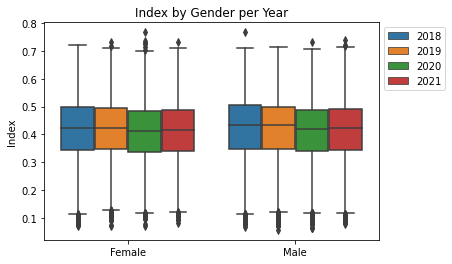

In [85]:
###########
#Genero P6020
###########
dic_P6020={"1.0":"Male","2.0": "Female"}
merge.P6020 = merge.P6020.astype("str").replace(dic_P6020, regex=False)
g = sns.boxplot(x="P6020",  y="indice", data=merge, hue="YEAR")
plt.title("Index by Gender per Year")
plt.xlabel(None)
plt.ylabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Index by year

No handles with labels found to put in legend.


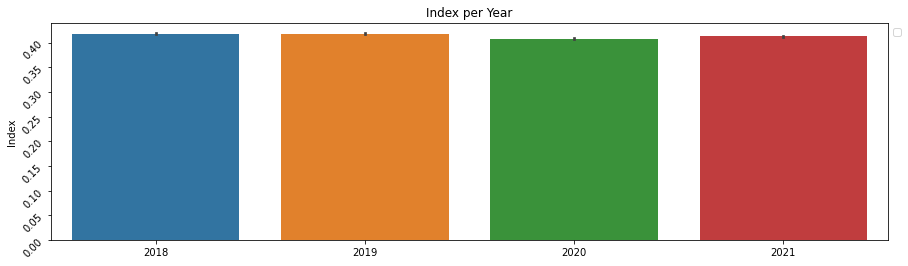

In [86]:
###########
#Index by year
###########
plt.figure(figsize=(15, 4)) 
sns.barplot(y="indice",  x="YEAR", data=merge)
plt.title("Index per Year")
plt.ylabel("Index")
plt.xlabel(None)
plt.yticks(rotation=45)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## REGION

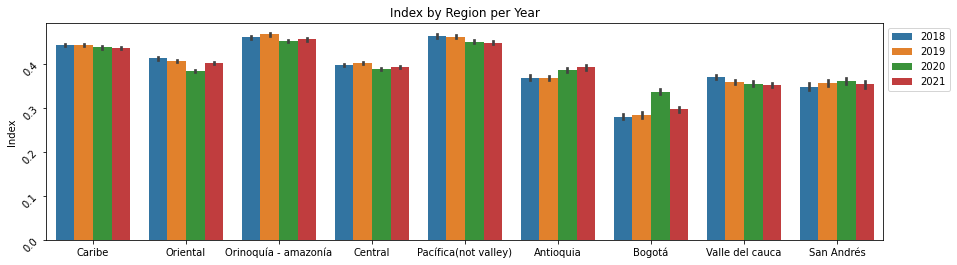

In [87]:
###########
#REGION
###########
dic_REGION={
"1.0":"Caribe",
"2.0":"Oriental",
"3.0":"Central",
"4.0":"Pacífica(not valley)",
"5.0":"Bogotá",
"6.0":"Antioquia",
"7.0":"Valle del cauca",
"8.0":"San Andrés",
"9.0":"Orinoquía - amazonía"
}
merge.REGION = merge.REGION.astype("str").replace(dic_REGION, regex=False )
plt.figure(figsize=(15, 4)) 
sns.barplot(y="indice",  x="REGION", data=merge, hue="YEAR")
plt.title("Index by Region per Year")
plt.ylabel("Index")
plt.xlabel(None)
plt.yticks(rotation=45)
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Ethnic Group P6080

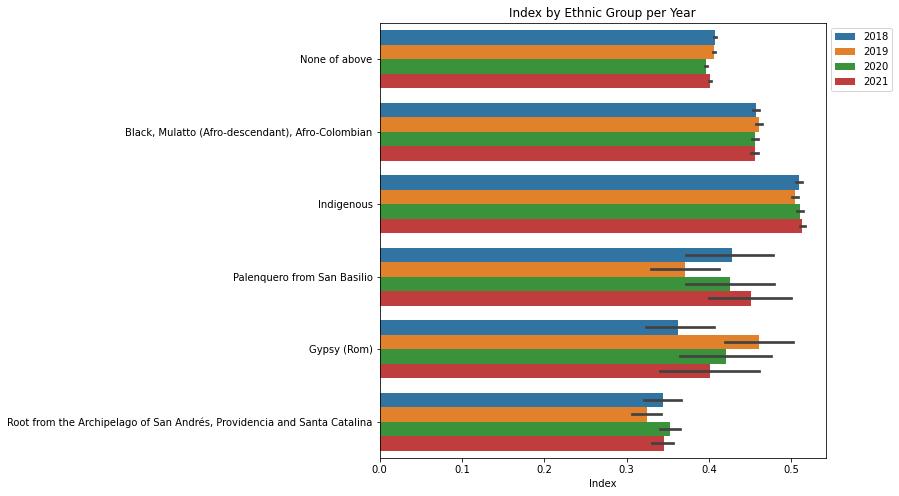

In [88]:
###########
#Etnia P6080
###########
dic_6080={
"1.0":"Indigenous",
"2.0":"Gypsy (Rom)",
"3.0":"Root from the Archipelago of San Andrés, Providencia and Santa Catalina",
"4.0":"Palenquero from San Basilio",
"5.0":"Black, Mulatto (Afro-descendant), Afro-Colombian",
"6.0":"None of above"
}
merge.P6080.dtype
merge.P6080=merge.P6080.astype("str").replace(dic_6080)
etnia=merge[["P6080","FEX_C"]].groupby('P6080')['FEX_C'].sum().reset_index(name="Total").sort_values(by="Total",ascending=False) # con sum para sumar el factor de expancion
plt.figure(figsize=(8, 8))
sns.barplot(y="P6080",  x="indice", data=merge, hue="YEAR")
plt.title("Index by Ethnic Group per Year")
plt.ylabel(None)
plt.xlabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Well being P1927

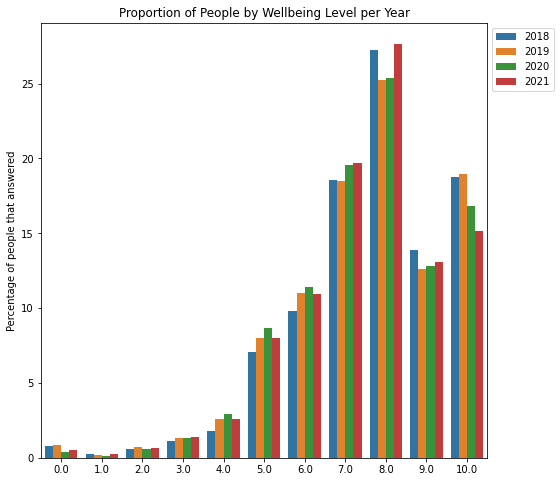

In [89]:
#########
# 0 es el escalón más bajo y 10 el escalón más alto. El más alto representa la mejor vida que usted podría tener y el más bajo, la peor
######### del 0 a 10 como considera su vida

tabla1 = merge[['YEAR', "P1927", "FEX_C"]].groupby(["YEAR", "P1927"])["FEX_C"].sum().reset_index()
tabla2 = merge[['YEAR', "P1927", "FEX_C"]].groupby("YEAR")["FEX_C"].sum().reset_index()
tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"]) * 100

plt.figure(figsize=(8, 8))
sns.barplot(y="percentage",  x="P1927", data=tabla1, hue="YEAR")
plt.title("Proportion of People by Wellbeing Level per Year")
plt.xlabel(None)
plt.ylabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

# DASH: Opción múltiple para cambiar de años

## CLASE

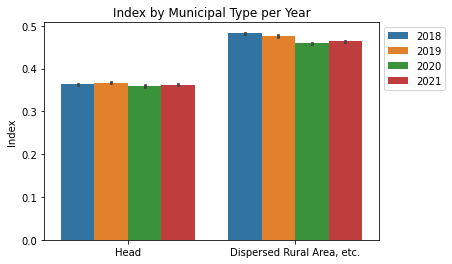

In [90]:
########### Tipo de minucipio en el que vive
dic_CLASE={
"1.0": "Head",
"2.0": "Dispersed Rural Area, etc.",
}
merge.CLASE=merge.CLASE.astype("str").replace(dic_CLASE)
clase = merge[["CLASE","FEX_C"]].groupby('CLASE')['FEX_C'].sum().reset_index(name="Total").sort_values(by="Total",ascending=False) # con sum para sumar el factor de expancion
sns.barplot(x="CLASE",  y="indice", data=merge, hue="YEAR")
plt.title("Index by Municipal Type per Year")
plt.xlabel(None)
plt.ylabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Type of Living Place P1070

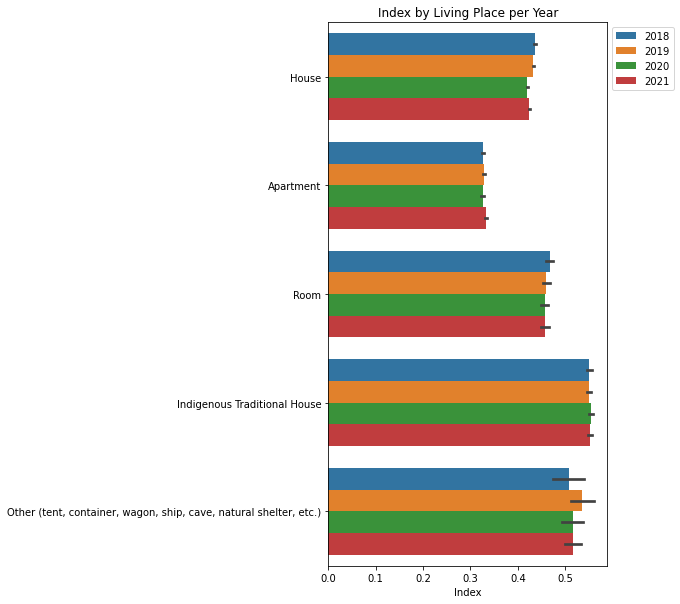

In [91]:
###########
#Tipo vivienda P1070
###########
dic_P1070={
"1.0":"House",
"2.0":"Apartment",
"3.0":"Room",
"4.0":"Indigenous Traditional House",
"5.0":"Other (tent, container, wagon, ship, cave, natural shelter, etc.)"
}
merge.P1070 = merge.P1070.astype("str").replace(dic_P1070)
clas_viv=merge[["P1070","FEX_C"]].groupby('P1070')['FEX_C'].sum().reset_index(name="Total").sort_values(by="Total",ascending=False) # con sum para sumar el factor de expancion
plt.figure(figsize=(5, 10))
sns.barplot(y="P1070",  x="indice", data=merge, hue="YEAR")
plt.title("Index by Living Place per Year")
plt.ylabel(None)
plt.xlabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Por hacer:
# Proporción de personas, en vez de índice

## External material of living place P4005

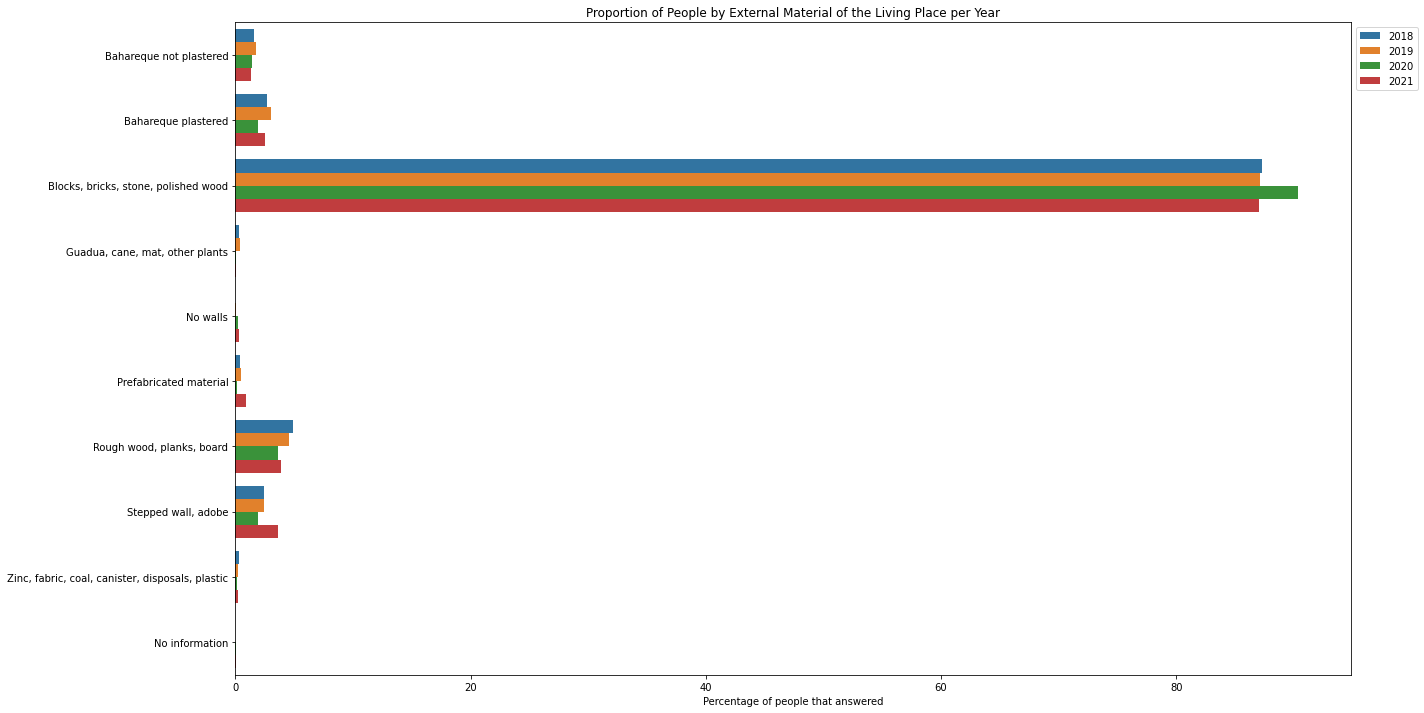

In [92]:
###########
#Material predominante exteriores P4005
###########
dic_P4005={
"1.0":"Blocks, bricks, stone, polished wood",
"2.0":"Stepped wall, adobe",
"3.0":"Bahareque plastered",
"4.0":"Bahareque not plastered",
"5.0":"Rough wood, planks, board",
"6.0":"Prefabricated material",
"7.0":"Guadua, cane, mat, other plants",
"8.0":"Zinc, fabric, coal, canister, disposals, plastic",
"9.0":"No walls",
"10.0": "No information",
}
merge.P4005=merge.P4005.astype("str").replace(dic_P4005)
tabla1 = merge[['YEAR', "P4005", "FEX_C"]].groupby(["YEAR", "P4005"])["FEX_C"].sum().reset_index()
tabla2 = merge[['YEAR', "P4005", "FEX_C"]].groupby("YEAR")["FEX_C"].sum().reset_index()
tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
# tabla1 = tabla1[tabla1["P4005"] != "Blocks, bricks, stone, polished wood"]
tabla1["percentage"] = tabla1["FEX_C_x"] / tabla1["FEX_C_y"] * 100

plt.figure(figsize=(20, 12))
sns.barplot(y="P4005",  x="percentage", data=tabla1, hue="YEAR")
plt.title("Proportion of People by External Material of the Living Place per Year")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

# DASH: usuario que pueda elegir qué materiales desea graficar

## Living Place's Floor Material P4015

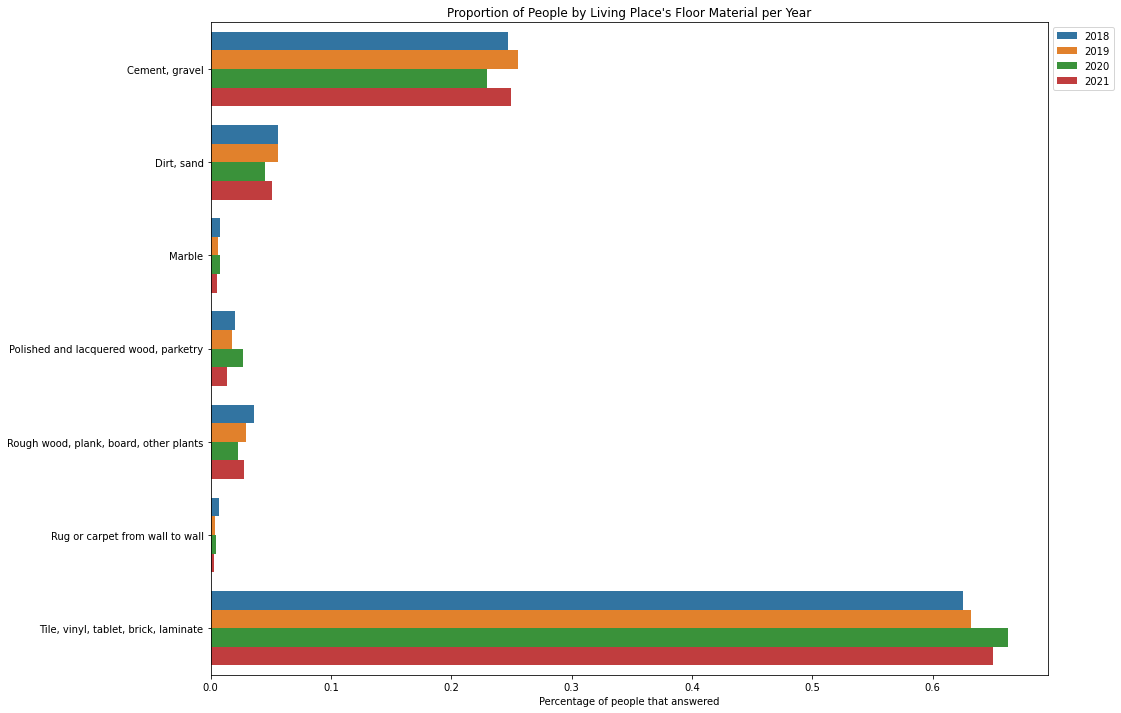

In [93]:
###########
# Material predominante pisos P4015
###########
dic_P4015={
"1.0":"Rug or carpet from wall to wall",
"2.0":"Polished and lacquered wood, parketry",
"3.0":"Marble",
"4.0":"Tile, vinyl, tablet, brick, laminate",
"5.0":"Rough wood, plank, board, other plants",
"6.0":"Cement, gravel",
"7.0":"Dirt, sand",
}


merge.P4015=merge.P4015.astype("str").replace(dic_P4015)
tabla1 = merge[['YEAR', "P4015", "FEX_C"]].groupby(["YEAR", "P4015"])["FEX_C"].sum().reset_index()
tabla2 = merge[['YEAR', "P4015", "FEX_C"]].groupby("YEAR")["FEX_C"].sum().reset_index()
tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
# tabla1 = tabla1[tabla1["P4015"] != "Tile, vinyl, tablet, brick, laminate"]
tabla1["percentage"] = tabla1["FEX_C_x"] / tabla1["FEX_C_y"]

plt.figure(figsize=(15, 12))
sns.barplot(y="P4015",  x="percentage", data=tabla1, hue="YEAR")
plt.title("Proportion of People by Living Place's Floor Material per Year")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)


# DASH: usuario escoge materiales

## Material of the Roof P4567

Text(0.5, 0, 'Percentage of people that answered')

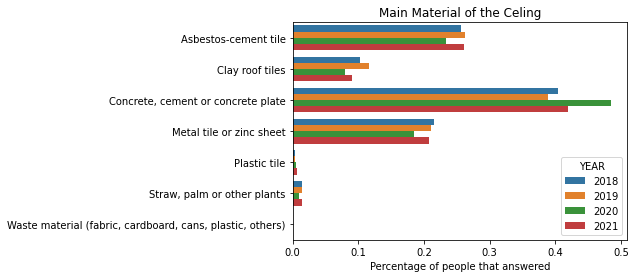

In [94]:
###########
#Material predominante techo o cubierta P4567
###########
dic_P4567={
"1.0":"Concrete, cement or concrete plate",
"2.0":"Clay roof tiles",
"3.0":"Asbestos-cement tile",
"4.0":"Metal tile or zinc sheet",
"5.0":"Plastic tile",
"6.0":"Straw, palm or other plants",
"7.0":"Waste material (fabric, cardboard, cans, plastic, others)"
}
#merge.P4567.dtype
#merge.P4567
merge.P4567=merge.P4567.astype("str").replace(dic_P4567)
tabla1=merge[["YEAR","P4567","FEX_C"]].groupby(['YEAR','P4567'])['FEX_C'].sum().reset_index()

tabla2=merge[["YEAR","P4567","FEX_C"]].groupby('YEAR')['FEX_C'].sum().reset_index()

tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = tabla1["FEX_C_x"] / tabla1["FEX_C_y"]
sns.barplot(y="P4567",  x="percentage", data=tabla1, hue='YEAR')
plt.title("Main Material of the Celing")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")

# GRaficar como proporción

 ## Affectation in the house P4065S1:P4065S4

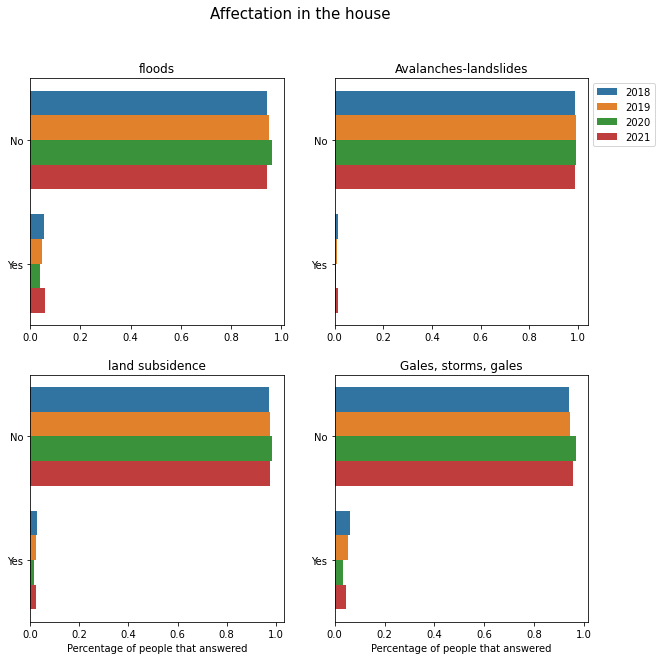

In [95]:
###########
#Afectaciones en vivienda En los últimos doce meses, P4065S1","P4065S2","P4065S3","P4065S4
###########
dic_afec={
"1.0":"Yes",
"2.0":"No"
}

tabla1=pd.melt(merge[["P4065S1","P4065S2","P4065S3","P4065S4","FEX_C",'YEAR']], 
         id_vars=['YEAR','FEX_C'], value_vars=["P4065S1","P4065S2","P4065S3","P4065S4"])
tabla1.value=tabla1.value.astype("str").replace(dic_afec)

tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"])
tabla1
tabla1.variable=tabla1.variable.replace({"P4065S1":"floods","P4065S2":"Avalanches-landslides",
                                                     "P4065S3":"land subsidence","P4065S4":"Gales, storms, gales"})
tabla1=tabla1[["YEAR","variable","percentage","value"]].groupby(["YEAR","variable","value"])['percentage'].sum().reset_index()
tabla1
plt.figure(figsize=(10,10))
plt.suptitle('Affectation in the house',size=15)
plt.subplot(2,2,1)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='floods'], hue='YEAR')
plt.title("floods")
plt.ylabel(None)
plt.xlabel(None)
plt.legend().remove()
plt.subplot(2,2,2)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Avalanches-landslides'], hue='YEAR')
plt.title("Avalanches-landslides")
plt.ylabel(None)
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.subplot(2,2,3)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='land subsidence'], hue='YEAR')
plt.title("land subsidence")
plt.ylabel(None)
plt.legend().remove()
plt.xlabel("Percentage of people that answered")
plt.subplot(2,2,4)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Gales, storms, gales'], hue='YEAR')
plt.title("Gales, storms, gales")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
plt.legend().remove()

## Public services P8520S1:P8520S4

Text(0.5, 0, 'Percentage of people that answered')

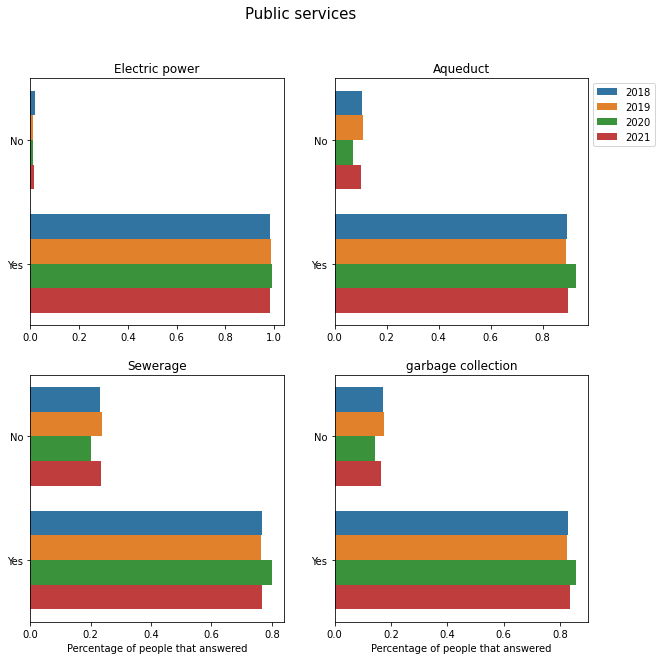

In [96]:
###########
#'Public services'P8520S1:P8520S4
###########
# GRaficar como proporción

dic_afec={
"1.0":"Yes",
"2.0":"No"
}

tabla1=pd.melt(merge[["P8520S1","P8520S5","P8520S3","P8520S4","FEX_C",'YEAR']], 
         id_vars=['YEAR','FEX_C'], value_vars=["P8520S1","P8520S5","P8520S3","P8520S4"])
tabla1.value=tabla1.value.astype("str").replace(dic_afec)

tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"])
tabla1
tabla1.variable=tabla1.variable.replace({"P8520S1":"Electric power","P8520S5":"Aqueduct",
                                                     "P8520S3":"Sewerage","P8520S4":"garbage collection"})
tabla1=tabla1[["YEAR","variable","percentage","value"]].groupby(["YEAR","variable","value"])['percentage'].sum().reset_index()
tabla1
plt.figure(figsize=(10,10))
plt.suptitle('Public services',size=15)
plt.subplot(2,2,1)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Electric power'], hue='YEAR')
plt.title("Electric power")
plt.ylabel(None)
plt.xlabel(None)
plt.legend().remove()
plt.subplot(2,2,2)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Aqueduct'], hue='YEAR')
plt.title("Aqueduct")
plt.ylabel(None)
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.subplot(2,2,3)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Sewerage'], hue='YEAR')
plt.title("Sewerage")
plt.ylabel(None)
plt.legend().remove()
plt.xlabel("Percentage of people that answered")
plt.subplot(2,2,4)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='garbage collection'], hue='YEAR')
plt.title("garbage collection")
plt.ylabel(None)
plt.legend().remove()
plt.xlabel("Percentage of people that answered")

## Problems in the housing sector P5661S2,3,4,9,7

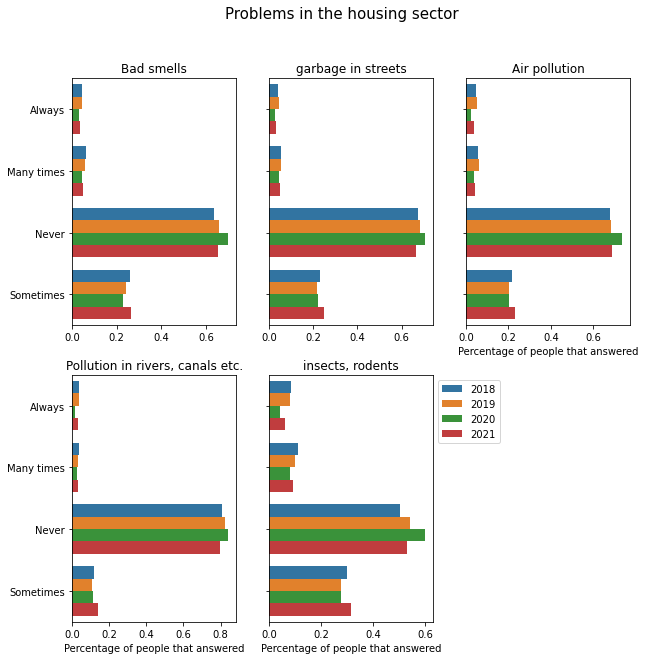

In [97]:
###########
#Problemas en el sector En los últimos doce meses,P5661S2 P5661S3 P5661S4 P5661S9 P5661S7
###########

# Proporción y traducir
dic_afec={
"1.0":"Never",
"2.0":"Sometimes",
"3.0":"Many times",
"4.0":"Always"
}

tabla1=pd.melt(merge[["P5661S2","P5661S3","P5661S4","P5661S9","P5661S7","FEX_C",'YEAR']], 
         id_vars=['YEAR','FEX_C'], value_vars=["P5661S2","P5661S3","P5661S4","P5661S9","P5661S7"])
tabla1.value=tabla1.value.astype("str").replace(dic_afec)

tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"])
tabla1
tabla1.variable=tabla1.variable.replace({"P5661S2":"Bad smells","P5661S3":"garbage in streets",
                                                     "P5661S4":"Air pollution","P5661S9":"Pollution in rivers, canals etc.","P5661S7":"insects, rodents"})
tabla1=tabla1[["YEAR","variable","percentage","value"]].groupby(["YEAR","variable","value"])['percentage'].sum().reset_index()
tabla1
plt.figure(figsize=(10,10))
plt.suptitle('Problems in the housing sector',size=15)
plt.subplot(2,3,1)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Bad smells'], hue='YEAR')
plt.title("Bad smells")
plt.ylabel(None)
plt.xlabel(None)
plt.legend().remove()
plt.subplot(2,3,2)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='garbage in streets'], hue='YEAR')
plt.title("garbage in streets")
plt.ylabel(None)
plt.xlabel(None)
plt.yticks((0,1,2,3), (None,None,None,None))
plt.legend().remove()
plt.subplot(2,3,3)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Air pollution'], hue='YEAR')
plt.title("Air pollution")
plt.ylabel(None)
plt.yticks((0,1,2,3), (None,None,None,None))
plt.legend().remove()
plt.xlabel("Percentage of people that answered")
plt.subplot(2,3,4)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Pollution in rivers, canals etc.'], hue='YEAR')
plt.title("Pollution in rivers, canals etc.")
plt.ylabel(None)
plt.legend().remove()
plt.xlabel("Percentage of people that answered")
plt.subplot(2,3,5)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='insects, rodents'], hue='YEAR')
plt.title("insects, rodents")
plt.ylabel(None)
plt.yticks((0,1,2,3), (None,None,None,None))
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)


## knows how to read and write P6160

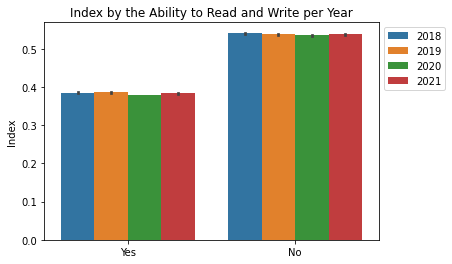

In [98]:
#############
# Sabe leer y escribir P6160
############
dic_P6160={
"1.0":"Yes",
"2.0":"No",
"NaN":np.nan
}

merge.P6160=merge.P6160.astype("str").replace(dic_P6160) 
clase = merge[["P6160","FEX_C"]].groupby('P6160')['FEX_C'].sum().reset_index(name="Total").sort_values(by="Total",ascending=False) # con sum para sumar el factor de expancion
sns.barplot(x="P6160",  y="indice", data=merge, hue="YEAR")
plt.title("Index by the Ability to Read and Write per Year")
plt.xlabel(None)
plt.ylabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
# Índice

## Level of education attained P8587

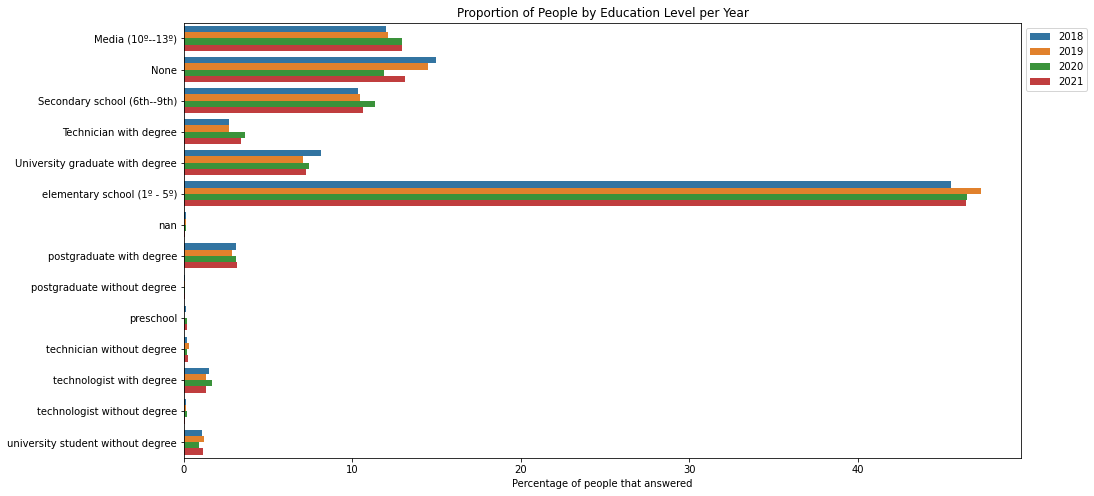

In [99]:
#############
# Nivel educacion alcanzado P8587
############
merge["P8587"] = merge["P8587"].replace("", np.nan).astype(float)

dic_P8587={
"1.0": "None",
"2.0": "preschool",
"3.0": "elementary school (1º - 5º)",
"4.0": "Secondary school (6th--9th)",
"5.0": "Media (10º--13º)",
"6.0": "technician without degree",
"7.0": "Technician with degree",
"8.0": "technologist without degree",
"9.0": "technologist with degree",
"10.0": "university student without degree",
"11.0": "University graduate with degree",
"12.0": "postgraduate without degree",
"13.0": "postgraduate with degree",
}

merge["P8587"] = merge["P8587"].astype(str).replace(dic_P8587)
tabla1 = merge[['YEAR', "P8587", "FEX_C"]].groupby(["YEAR", "P8587"])["FEX_C"].sum().reset_index()
tabla2 = merge[['YEAR', "P8587", "FEX_C"]].groupby("YEAR")["FEX_C"].sum().reset_index()
tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"]) * 100

plt.figure(figsize=(15, 8))
sns.barplot(x="percentage", y="P8587", data=tabla1, hue="YEAR")
plt.title("Proportion of People by Education Level per Year")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

## activity last week P6240

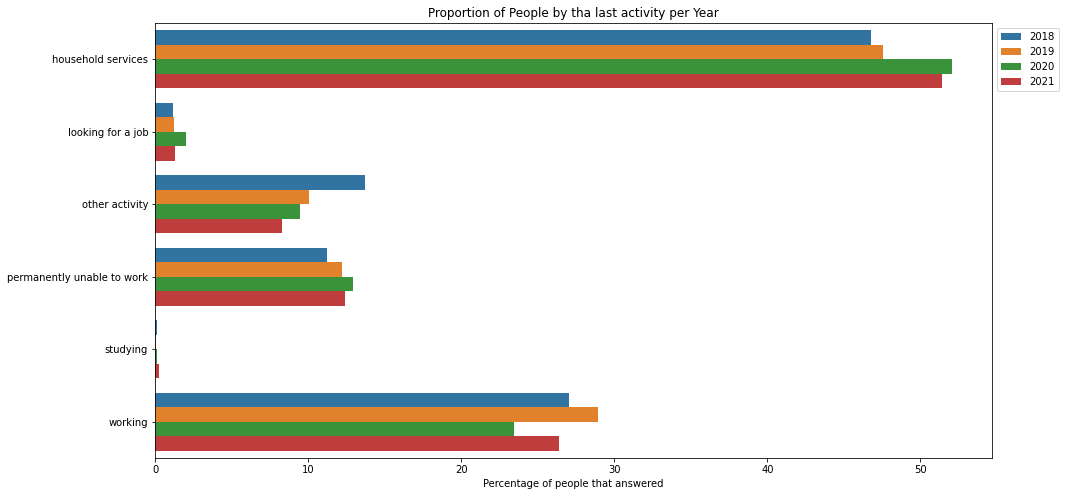

In [100]:
#############
# ¿en que actividad ocupó...... la mayor parte del tiempo la semana pasada? P6240
############
dic_P6240={
1.0: "working",
2.0: "looking for a job",
3.0: "studying",
4.0: "household services",
5.0: "permanently unable to work",
6.0: "other activity",
}

merge["P6240"] = merge["P6240"].replace(dic_P6240)
tabla1 = merge[['YEAR', "P6240", "FEX_C"]].groupby(["YEAR", "P6240"])["FEX_C"].sum().reset_index()
tabla2 = merge[['YEAR', "P6240", "FEX_C"]].groupby("YEAR")["FEX_C"].sum().reset_index()
tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"]) * 100

plt.figure(figsize=(15, 8))
sns.barplot(x="percentage", y="P6240", data=tabla1, hue="YEAR")
plt.title("Proportion of People by tha last activity per Year")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Proporción

## Unpaid work P6270

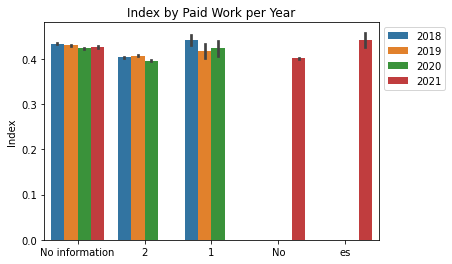

In [101]:
#############
# ¿....trabajó la semana pasada en un negocio por una hora o más sin que le pagaran? P6270
############
merge["P6270"] = merge["P6270"].replace("", np.nan)

dic_P6270={
"1.0": "es",
"2.0": "No",
"nan": "No information",
}

merge["P6270"] = merge["P6270"].astype(str).replace(dic_P6270)
clase = merge[["P6270","FEX_C"]].groupby('P6270')['FEX_C'].sum().reset_index(name="Total").sort_values(by="Total",ascending=False) # con sum para sumar el factor de expancion
sns.barplot(x="P6270",  y="indice", data=merge, hue="YEAR")
plt.title("Index by Paid Work per Year")
plt.xlabel(None)
plt.ylabel("Index")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
# Índice

## Use of technology P1910-1912

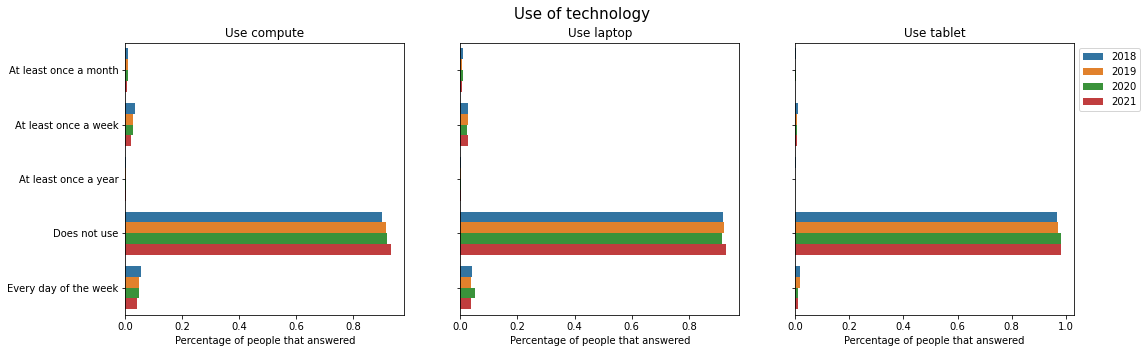

In [102]:
#uso de tecnologia "P1910","P1911","P1912"
dic_tec={
"1.0":"Every day of the week",
"2.0":"At least once a week",
"3.0":"At least once a month",
"4.0":"At least once a year",
"5.0":"Does not use"
}

tabla1=pd.melt(merge[["P1910","P1911","P1912","FEX_C",'YEAR']], 
         id_vars=['YEAR','FEX_C'], value_vars=["P1910","P1911","P1912"])
tabla1.value=tabla1.value.astype("str").replace(dic_tec)

tabla1 = tabla1.merge(tabla2, how="left", on="YEAR")
tabla1["percentage"] = (tabla1["FEX_C_x"] / tabla1["FEX_C_y"])
tabla1
tabla1.variable=tabla1.variable.replace({"P1910":"Use computer","P1911":"Use laptop","P1912":"Use tablet"})
tabla1=tabla1[["YEAR","variable","percentage","value"]].groupby(["YEAR","variable","value"])['percentage'].sum().reset_index()
tabla1
plt.figure(figsize=(17,5))
plt.suptitle('Use of technology ',size=15)
plt.subplot(1,3,1)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Use computer'], hue='YEAR')
plt.title("Use compute")
plt.ylabel(None)
plt.xlabel("Percentage of people that answered")
plt.legend().remove()
plt.subplot(1,3,2)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Use laptop'], hue='YEAR')
plt.title("Use laptop")
plt.ylabel(None)
plt.yticks((0,1,2,3,4), (None,None,None,None,None))
plt.xlabel("Percentage of people that answered")
plt.legend().remove()
plt.subplot(1,3,3)
sns.barplot(y="value",  x="percentage", data=tabla1[tabla1["variable"]=='Use tablet'], hue='YEAR')
plt.title("Use tablet")
plt.ylabel(None)
plt.yticks((0,1,2,3,4), (None,None,None,None,None))
plt.xlabel("Percentage of people that answered")
_ = plt.legend(bbox_to_anchor=(1, 1), loc=2)
# Proporción

## total income

In [103]:
############
# total income
#########
merge.P8624=merge.P8624.replace('',np.nan).astype(float)
merge.P8642S1=merge.P8642S1.replace('',np.nan).astype(float)
merge.P8644S1=merge.P8644S1.replace('',np.nan).astype(float)
merge.P8646S1=merge.P8646S1.replace('',np.nan).astype(float)
merge["Income"] =merge[["P8624","P8642S1","P8644S1","P8646S1"]].sum(axis=1)
#merge.VTOTAL1.dtype
# merge.P6020


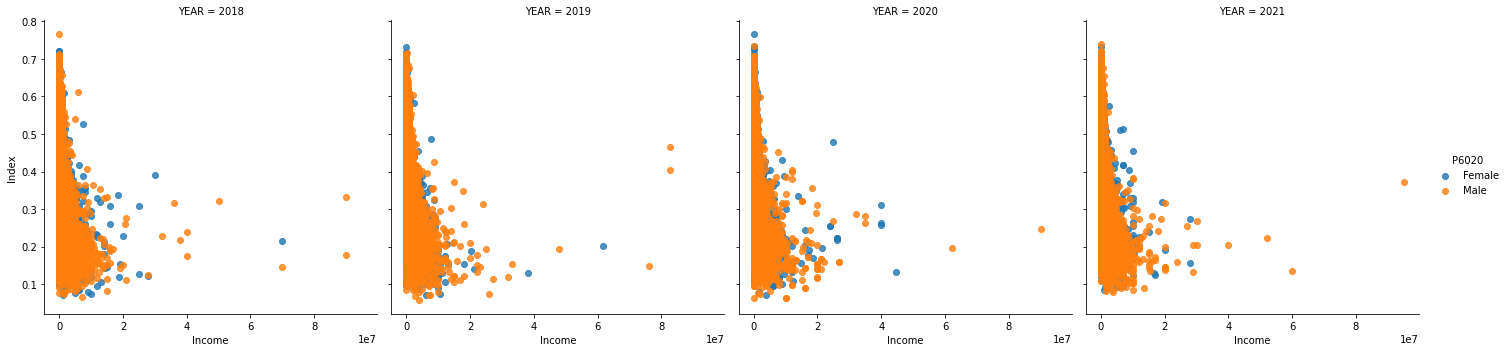

In [104]:
p=sns.lmplot( x="Income", y="indice",hue='P6020',col='YEAR', data=merge,fit_reg=False, )
p.set_ylabels(label="Index", clear_inner=True)

Text(0.5, 1.0, 'Distribution of earnings in last month by sex')

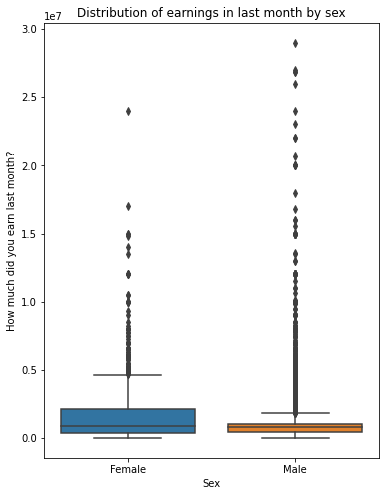

In [105]:
#pureba hay que sumar las variables de ingreso
# sns.boxplot( x="P6020", y="P8624",data=merge )
plt.figure(figsize=(6, 8)) 
sns.boxplot( x="P6020", y="P8624",data=merge )
plt.xticks((0,1), ("Female", "Male"))
plt.ylabel("How much did you earn last month?")
plt.xlabel("Sex")
plt.title("Distribution of earnings in last month by sex")

# gráfico dispersión entre VTOTAL1 contra Indice por año coloreando por mujeres y hombres

## Correlation Between Dimension

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



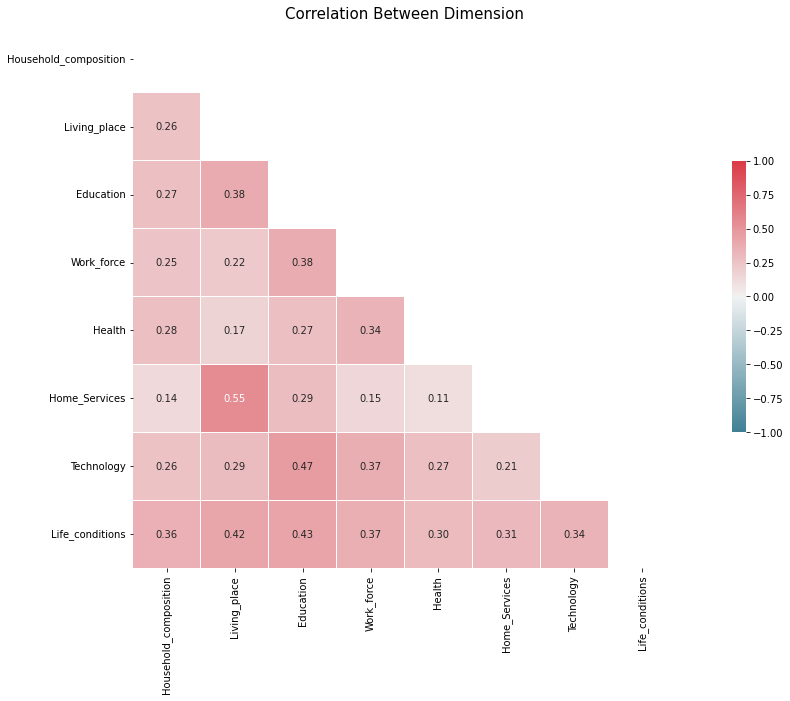

In [106]:
#compute correlation matrix
df_correlations = merge[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions']].corr()
#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (20,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap,
            center=0,
            annot=True, fmt='.2f' ,
           square=True, linewidths=.5, cbar_kws={"shrink": .5});
_=plt.title('Correlation Between Dimension', size=15)

## Cluster

In [107]:
# Agregar gráfico de cluster con los valores del índice para cada dimensión
df=df[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions']]
#cluster optimos de K clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

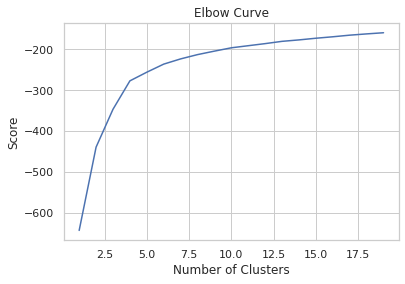

In [108]:
sns.set(style='whitegrid')
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.53415062e-02 4.83143153e-02 1.25000000e-01 5.55964855e-02
  2.59753605e-02 7.69902083e-02 1.13044198e-01 5.82137736e-02]
 [5.25508624e-02 1.57212680e-02 2.26967353e-05 3.54302523e-02
  1.45602455e-02 2.68010187e-02 8.23227612e-02 2.79634090e-02]
 [6.17892771e-02 4.26115658e-02 6.11290225e-02 5.26489781e-02
  2.40370567e-02 7.50365398e-02 1.03514071e-01 5.30054794e-02]
 [6.36492832e-02 2.88653589e-02 1.25000000e-01 5.70263849e-02
  2.88253417e-02 2.70683800e-02 1.09768929e-01 5.42769537e-02]
 [5.95710761e-02 2.04389399e-02 6.24919206e-02 5.05639098e-02
  2.20969247e-02 2.28531490e-02 1.00059730e-01 4.21270984e-02]]


In [110]:
# Predicting the clusters
merge["Cluster"] = kmeans.predict(df)
df["Cluster"] = kmeans.predict(df)

In [111]:
#sns.lmplot( x="Household_composition", y="Living_place", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Education", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Work_force", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Health", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Home_Services", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Household_composition", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Education", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Work_force", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Health", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Home_Services", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Living_place", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Education", y="Work_force", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Education", y="Health", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Education", y="Home_Services", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Education", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Education", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Work_force", y="Health", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Work_force", y="Home_Services", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Work_force", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Work_force", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Health", y="Home_Services", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Health", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Health", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Home_Services", y="Technology", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Home_Services", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)
# sns.lmplot( x="Technology", y="Life_conditions", data=merge, fit_reg=False, hue='Cluster', legend=False)

Text(0.5, 0, 'Education')

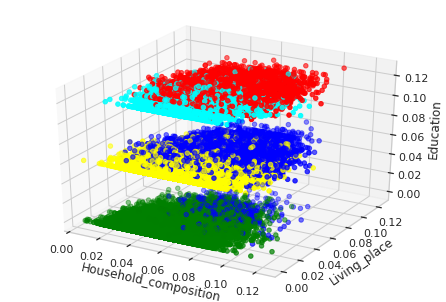

In [112]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
labels = df.Cluster
# Getting the cluster centers
C = kmeans.cluster_centers_
C
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df["Household_composition"], df["Living_place"], df["Education"], c=asignar)
ax.set_xlabel("Household_composition")
ax.set_ylabel("Living_place")
ax.set_zlabel("Education")

## radial chart

In [113]:
prueba2=merge[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions','YEAR']].groupby("YEAR")['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions'].mean().reset_index()
prueba2=prueba2[['Household_composition','Living_place','Education','Work_force','Health','Home_Services','Technology','Life_conditions']]
prueba2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Household_composition  Living_place  Education  Work_force    Health  \
0               0.059329      0.030461   0.064601    0.049751  0.023669   
1               0.059745      0.030200   0.064337    0.049228  0.022903   
2               0.060120      0.028127   0.062192    0.049437  0.021121   
3               0.060519      0.029467   0.062365    0.049732  0.021363   

   Home_Services  Technology  Life_conditions  
0       0.045180    0.100488         0.045056  
1       0.045564    0.100622         0.045667  
2       0.043206    0.099705         0.044536  
3       0.043692    0.099718         0.046387

In [114]:
prueba2

Household_composition  Living_place  Education  Work_force    Health  \
0               0.059329      0.030461   0.064601    0.049751  0.023669   
1               0.059745      0.030200   0.064337    0.049228  0.022903   
2               0.060120      0.028127   0.062192    0.049437  0.021121   
3               0.060519      0.029467   0.062365    0.049732  0.021363   

   Home_Services  Technology  Life_conditions  
0       0.045180    0.100488         0.045056  
1       0.045564    0.100622         0.045667  
2       0.043206    0.099705         0.044536  
3       0.043692    0.099718         0.046387

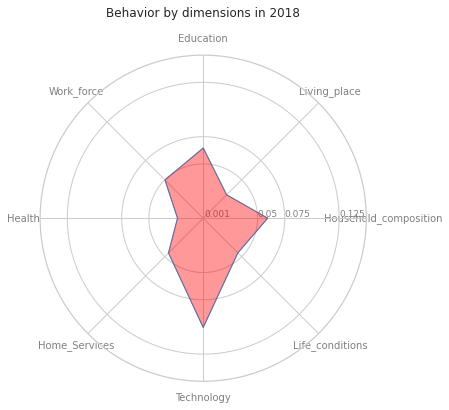

In [115]:
# RADIAL 2018
categories=list(prueba2)
N = len(categories)
values=prueba2.loc[0].values.flatten().tolist()
values += values[:1]
values
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles, categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.001,0.05,0.075,0.125], ["0.001","0.05","0.075","0.125"], color="grey", size=9)
plt.ylim(0,0.15)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.4,color='red')
plt.title("Behavior by dimensions in 2018", size=12, position=(0.5, 1.1))
plt.show()
# Cambiar los acrónimos por el nombre completo/resumido (inglés wey)

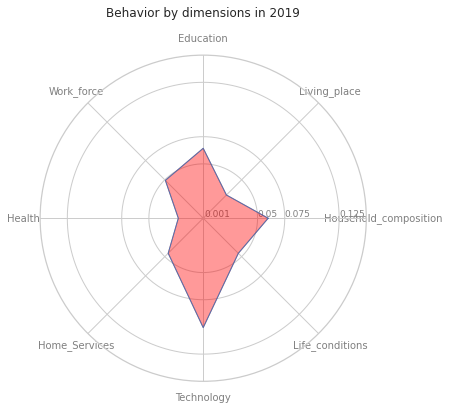

In [116]:
# number of variable
categories=list(prueba2)
N = len(categories)
values=prueba2.loc[1].values.flatten().tolist()
values += values[:1]
values
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles, categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.001,0.05,0.075,0.125], ["0.001","0.05","0.075","0.125"], color="grey", size=9)
plt.ylim(0,0.15)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.4,color='red')
plt.title("Behavior by dimensions in 2019", size=12, position=(0.5, 1.1))
plt.show()
# Cambiar los acrónimos por el nombre completo/resumido (inglés wey)

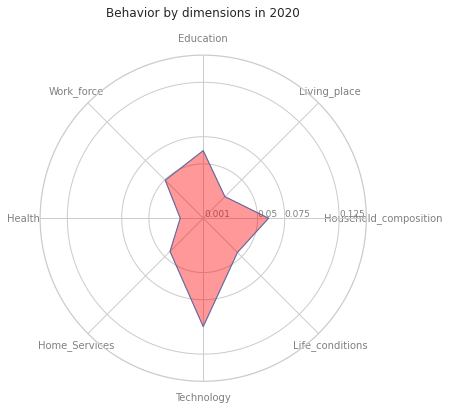

In [117]:
# number of variable
categories=list(prueba2)
N = len(categories)
values=prueba2.loc[2].values.flatten().tolist()
values += values[:1]
values
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles, categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.001,0.05,0.075,0.125], ["0.001","0.05","0.075","0.125"], color="grey", size=9)
plt.ylim(0,0.15)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.4,color='red')
plt.title("Behavior by dimensions in 2020", size=12, position=(0.5, 1.1))
plt.show()
# Cambiar los acrónimos por el nombre completo/resumido (inglés wey)

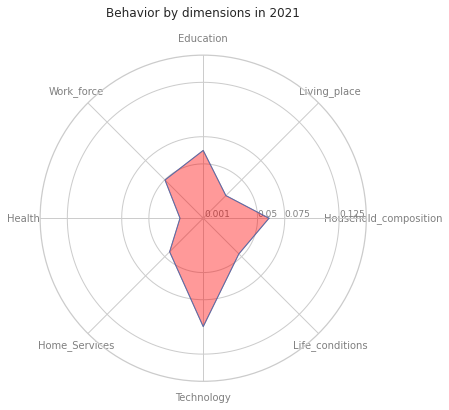

In [118]:
# number of variable
categories=list(prueba2)
N = len(categories)
values=prueba2.loc[3].values.flatten().tolist()
values += values[:1]
values
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles, categories, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.001,0.05,0.075,0.125], ["0.001","0.05","0.075","0.125"], color="grey", size=9)
plt.ylim(0,0.15)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.4,color='red')
plt.title("Behavior by dimensions in 2021", size=12, position=(0.5, 1.1))
plt.show()
# Cambiar los acrónimos por el nombre completo/resumido (inglés wey)

In [119]:
df.loc[0].values.flatten().tolist()

[0.057954359999999996,
 0.0432693,
 0.0,
 0.053571428580000004,
 0.044643,
 0.0208333,
 0.0625,
 0.0416667,
 1.0]

# Index Hypothesis Tests:

In [120]:
import statsmodels.stats.weightstats

## CLASE



In [121]:
rural = merge[merge["CLASE"]=="Dispersed Rural Area, etc."]["indice"]
head = merge[merge["CLASE"]=="Head"]["indice"]

statsmodels.stats.weightstats.ttest_ind(rural, head, alternative='two-sided', usevar='pooled',
                                        weights=(merge[merge["CLASE"]=="Dispersed Rural Area, etc."]["FEX_C"], merge[merge["CLASE"]=="Head"]["FEX_C"]),
                                        value=0)

(3234.3046276428163, 0.0, 28052167.076317392)

In [122]:
x = (merge["CLASE"] == "Dispersed Rural Area, etc.").astype("int64")
x = sm.add_constant(x)
y = merge["indice"]
model = sm.WLS(y, x, weights=(merge["FEX_C"])**2)
results = model.fit()
results.params

const    0.307669
CLASE    0.164096
dtype: float64

In [123]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.145
Model:                            WLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                 2.616e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:39   Log-Likelihood:                -68375.
No. Observations:              153792   AIC:                         1.368e+05
Df Residuals:                  153790   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3077      0.000   1253.311      0.000       0.307       0.308
CLASE          0.1641      0.001    161.736      0.000       0.162       0.166
==============================================================================
Omnibus:                    59463.498   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7664362.847
Skew:                          -0.841   Prob(JB):                         0.00
Kurtosis:                      37.543   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

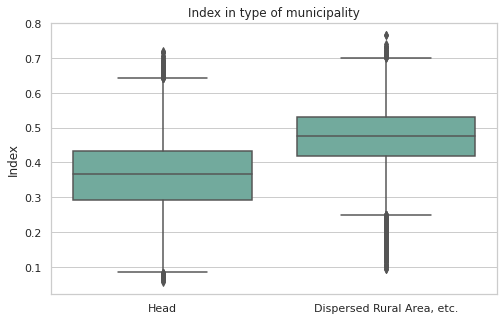

In [124]:
plt.figure(figsize=(8, 5))
g = sns.boxplot(x="CLASE",  y="indice", data=merge, color='#69b3a2'
# , estimator=
)
plt.title("Index in type of municipality")
plt.xlabel(None)
plt.ylabel("Index")

## Gender

In [125]:
hombres = merge[merge["P6020"]=="Male"]["indice"]
mujeres = merge[merge["P6020"]=="Female"]["indice"]

statsmodels.stats.weightstats.ttest_ind(hombres, mujeres, alternative='two-sided', usevar='pooled',
                                        weights=(merge[merge["P6020"]=="Male"]["FEX_C"], merge[merge["P6020"]=="Female"]["FEX_C"]),
                                        value=0)


(-66.35942000781282, 0.0, 28052167.076317392)

In [126]:
x = (merge["P6020"] == "Male").astype("int64")
x = sm.add_constant(x)
y = merge["indice"]
model = sm.WLS(y, x, weights=(merge["FEX_C"])**2)
results = model.fit()
results.params

const    0.323847
P6020   -0.014639
dtype: float64

In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     802.8
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          3.86e-176
Time:                        23:56:39   Log-Likelihood:                -80054.
No. Observations:              153792   AIC:                         1.601e+05
Df Residuals:                  153790   BIC:                         1.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3238      0.000    935.556      0.000       0.323       0.325
P6020         -0.0146      0.001    -28.333      0.000      -0.016      -0.014
==============================================================================
Omnibus:                    78846.959   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5939190.319
Skew:                          -1.620   Prob(JB):                         0.00
Kurtosis:                      33.271   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

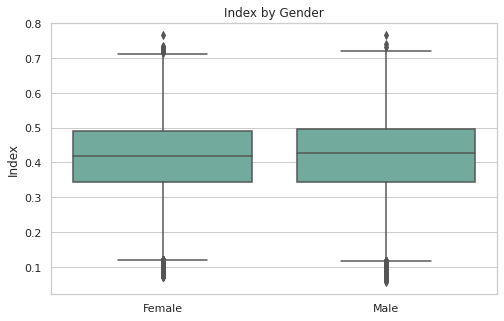

In [128]:
plt.figure(figsize=(8, 5))
g = sns.boxplot(x="P6020",  y="indice", data=merge, color='#69b3a2'
# , estimator=
)
plt.title("Index by Gender")
plt.xlabel(None)
plt.ylabel("Index")

## Literacy: Do you know how to read?

In [129]:
yes = merge[merge["P6160"]=="Yes"]["indice"]
no = merge[merge["P6160"]=="No"]["indice"]

statsmodels.stats.weightstats.ttest_ind(yes, no, alternative='two-sided', usevar='pooled',
                                        weights=(merge[merge["P6160"]=="Yes"]["FEX_C"], merge[merge["P6160"]=="No"]["FEX_C"]),
                                        value=0)

(-3400.0153026712305, 0.0, 28052167.07631739)

In [130]:
x = (merge["P6160"]=="Yes").astype("int64")
x = sm.add_constant(x)
y = merge["indice"]
model = sm.WLS(y, x, weights=(merge["FEX_C"])**2)
results = model.fit()
results.params

const    0.490567
P6160   -0.186020
dtype: float64

In [131]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.216
Model:                            WLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                 4.239e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:40   Log-Likelihood:                -61735.
No. Observations:              153792   AIC:                         1.235e+05
Df Residuals:                  153790   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4906      0.001    562.528      0.000       0.489       0.492
P6160         -0.1860      0.001   -205.880      0.000      -0.188      -0.184
==============================================================================
Omnibus:                    86328.619   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8280729.611
Skew:                          -1.807   Prob(JB):                         0.00
Kurtosis:                      38.766   Cond. No.                         7.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

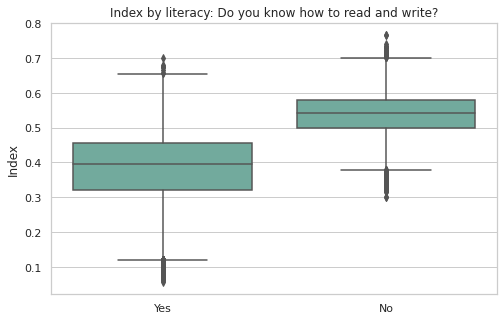

In [132]:
plt.figure(figsize=(8, 5))
g = sns.boxplot(x="P6160",  y="indice", data=merge, color='#69b3a2'
# , estimator=
)
plt.title("Index by literacy: Do you know how to read and write?")
plt.xlabel(None)
plt.ylabel("Index")

## REGION

In [133]:
pg.anova(data=merge, dv='indice', between='REGION', detailed=True)

Source           SS      DF         MS            F  p-unc       np2
0  REGION   182.385055       8  22.798132  2104.484916    0.0  0.098675
1  Within  1665.949270  153783   0.010833          NaN    NaN       NaN

In [134]:
x = merge["REGION"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x
            # weights=merge["FEX_C"]**2
            ).fit()
# sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.099
Model:                            WLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2104.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:41   Log-Likelihood:             1.2975e+05
No. Observations:              153792   AIC:                        -2.595e+05
Df Residuals:                  153783   BIC:                        -2.594e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Antioquia                0.3791      0.001    307.005      0.000       0.377       0.382
Bogotá                   0.3036      0.002    177.480      0.000       0.300       0.307
Caribe                   0.4398      0.001    779.494      0.000       0.439       0.441
Central                  0.3952      0.001    728.993      0.000       0.394       0.396
Oriental                 0.4015      0.001    675.105      0.000       0.400       0.403
Orinoquía - amazonía     0.4583      0.001    607.731      0.000       0.457       0.460
Pacífica(not valley)     0.4558      0.001    518.069      0.000       0.454       0.457
San Andrés               0.3547      0.002    143.939      0.000       0.350       0.360
Valle del cauca          0.3588      0.001    280.740      0.000       0.356       0.361
==============================================================================
Omnibus:                     3336.246   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3498.323
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       2.835   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

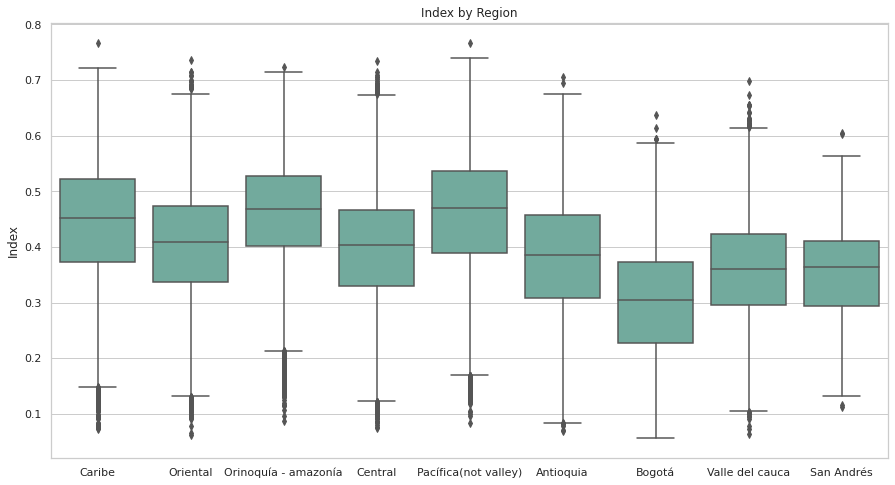

In [135]:
plt.figure(figsize=(15, 8))
g = sns.boxplot(x="REGION",  y="indice", data=merge, color='#69b3a2'
# , estimator=
)
plt.title("Index by Region")
plt.xlabel(None)
plt.ylabel("Index")

## Ethnic Group

In [136]:
pg.anova(data=merge, dv='indice', between='P6080', detailed=True)

Source           SS      DF         MS            F  p-unc       np2
0   P6080   140.835447       5  28.167089  2536.870779    0.0  0.076196
1  Within  1707.498878  153786   0.011103          NaN    NaN       NaN

In [137]:
x = merge["P6080"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.076
Model:                            WLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2537.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:41   Log-Likelihood:             1.2785e+05
No. Observations:              153792   AIC:                        -2.557e+05
Df Residuals:                  153786   BIC:                        -2.556e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Black, Mulatto (Afro-descendant), Afro-Colombian                            0.4575      0.001    476.357      0.000       0.456       0.459
Gypsy (Rom)                                                                 0.4318      0.015     28.092      0.000       0.402       0.462
Indigenous                                                                  0.5092      0.001    506.985      0.000       0.507       0.511
None of above                                                               0.4030      0.000   1379.534      0.000       0.402       0.404
Palenquero from San Basilio                                                 0.4076      0.013     32.129      0.000       0.383       0.432
Root from the Archipelago of San Andrés, Providencia and Santa Catalina     0.3431      0.005     73.739      0.000       0.334       0.352
==============================================================================
Omnibus:                     2786.110   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2775.064
Skew:                          -0.306   Prob(JB):                         0.00
Kurtosis:                       2.757   Cond. No.                         52.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

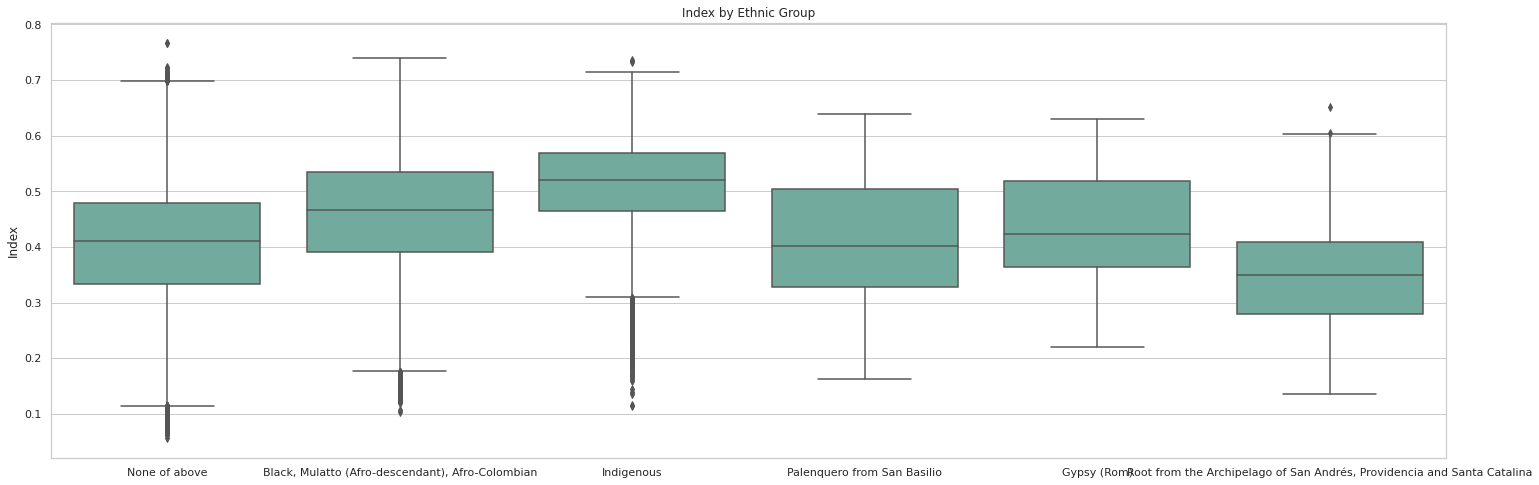

In [138]:
plt.figure(figsize=(25, 8))
g = sns.boxplot(x="P6080",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by Ethnic Group")
plt.xlabel(None)
plt.ylabel("Index")

## Level of education attained

In [139]:
pg.anova(data=merge, dv='indice', between='P8587', detailed=True)

Source           SS      DF         MS             F  p-unc       np2
0   P8587  1138.414656      13  87.570358  18968.899037    0.0  0.615914
1  Within   709.919669  153778   0.004617           NaN    NaN       NaN

In [140]:
x = merge["P8587"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.616
Model:                            WLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 1.897e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:42   Log-Likelihood:             1.9534e+05
No. Observations:              153792   AIC:                        -3.907e+05
Df Residuals:                  153778   BIC:                        -3.905e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Media (10º--13º)                      0.2894      0.001    492.878      0.000       0.288       0.291
None                                  0.5280      0.000   1379.086      0.000       0.527       0.529
Secondary school (6th--9th)           0.3807      0.001    629.933      0.000       0.379       0.382
Technician with degree                0.2636      0.001    207.032      0.000       0.261       0.266
University graduate with degree       0.2282      0.001    274.795      0.000       0.227       0.230
elementary school (1º - 5º)           0.4297      0.000   1798.566      0.000       0.429       0.430
nan                                   0.2920      0.006     52.643      0.000       0.281       0.303
postgraduate with degree              0.2055      0.001    160.561      0.000       0.203       0.208
postgraduate without degree           0.2164      0.008     27.770      0.000       0.201       0.232
preschool                             0.4756      0.004    124.424      0.000       0.468       0.483
technician without degree             0.2856      0.005     62.620      0.000       0.277       0.294
technologist with degree              0.2467      0.002    127.474      0.000       0.243       0.250
technologist without degree           0.2544      0.007     37.252      0.000       0.241       0.268
university student without degree     0.2587      0.002    115.822      0.000       0.254       0.263
==============================================================================
Omnibus:                       70.001   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.457
Skew:                           0.007   Prob(JB):                     1.66e-14
Kurtosis:                       2.901   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

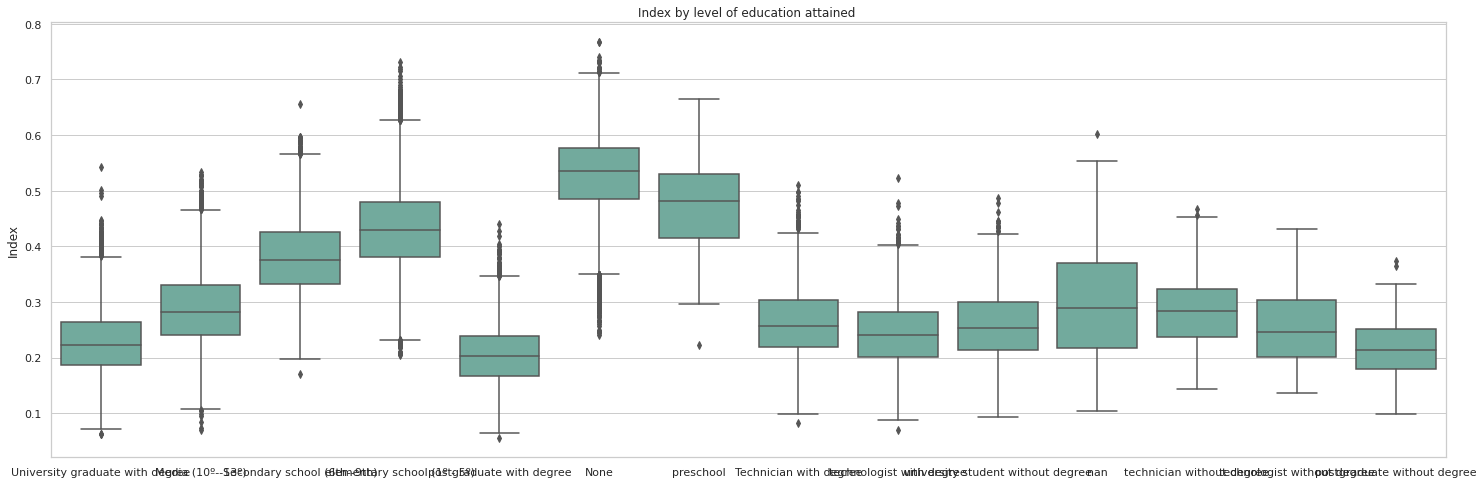

In [141]:
plt.figure(figsize=(25, 8))
g = sns.boxplot(x="P8587",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by level of education attained ")
plt.xlabel(None)
plt.ylabel("Index")

## Type of Living Place

In [142]:
pg.anova(data=merge, dv='indice', between='P1070', detailed=True)

Source           SS      DF         MS            F  p-unc       np2
0   P1070   244.610724       4  61.152681  5864.157225    0.0  0.132341
1  Within  1603.723601  153787   0.010428          NaN    NaN       NaN

In [143]:
x = merge["P1070"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.132
Model:                            WLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5864.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:43   Log-Likelihood:             1.3268e+05
No. Observations:              153792   AIC:                        -2.653e+05
Df Residuals:                  153787   BIC:                        -2.653e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Apartment                                                             0.3283      0.001    497.155      0.000       0.327       0.330
House                                                                 0.4281      0.000   1486.231      0.000       0.427       0.429
Indigenous Traditional House                                          0.5519      0.002    240.977      0.000       0.547       0.556
Other (tent, container, wagon, ship, cave, natural shelter, etc.)     0.5189      0.008     68.923      0.000       0.504       0.534
Room                                                                  0.4601      0.002    200.899      0.000       0.456       0.465
==============================================================================
Omnibus:                     2214.330   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2261.456
Skew:                          -0.285   Prob(JB):                         0.00
Kurtosis:                       2.836   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

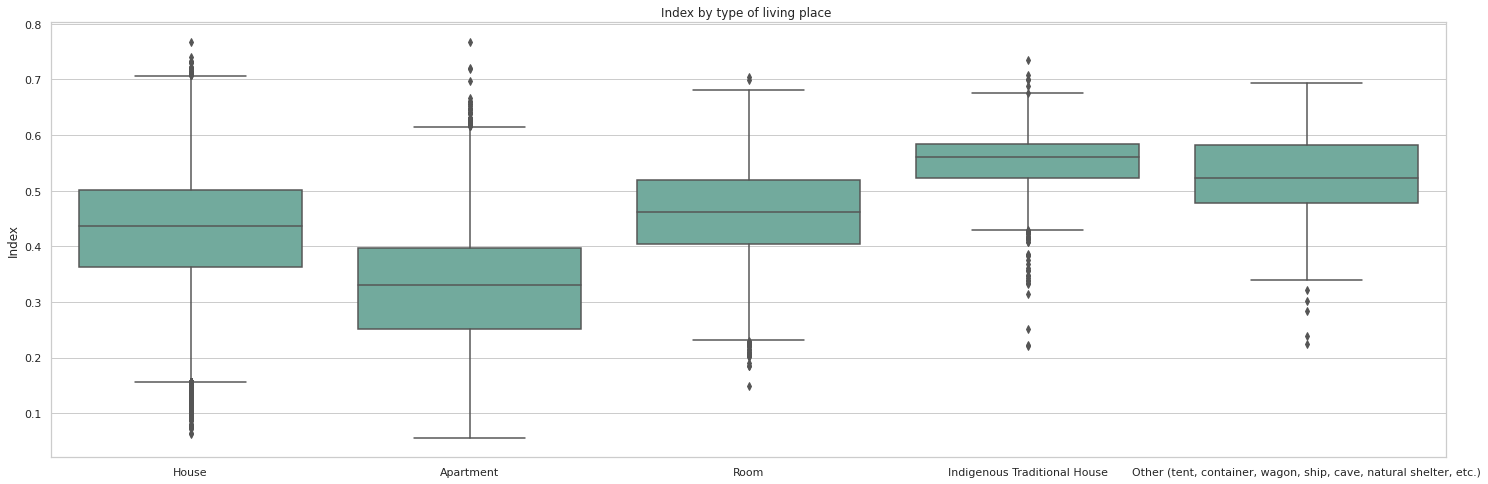

In [144]:
plt.figure(figsize=(25, 8))
g = sns.boxplot(x="P1070",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by type of living place ")
plt.xlabel(None)
plt.ylabel("Index")

## External material of living place

In [145]:
pg.anova(data=merge, dv='indice', between='P4005', detailed=True)

Source           SS      DF         MS            F  p-unc       np2
0   P4005   369.450153       9  41.050017  4268.592379    0.0  0.199883
1  Within  1478.884173  153782   0.009617          NaN    NaN       NaN

In [146]:
x = merge["P4005"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.200
Model:                            WLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     4269.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:44   Log-Likelihood:             1.3891e+05
No. Observations:              153792   AIC:                        -2.778e+05
Df Residuals:                  153782   BIC:                        -2.777e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Bahareque not plastered                              0.5213      0.002    346.046      0.000       0.518       0.524
Bahareque plastered                                  0.4813      0.001    409.803      0.000       0.479       0.484
Blocks, bricks, stone, polished wood                 0.3881      0.000   1358.745      0.000       0.388       0.389
Guadua, cane, mat, other plants                      0.5158      0.004    140.046      0.000       0.509       0.523
No information                                       0.5379      0.013     41.412      0.000       0.512       0.563
No walls                                             0.5140      0.004    135.561      0.000       0.507       0.521
Prefabricated material                               0.4189      0.003    125.781      0.000       0.412       0.425
Rough wood, planks, board                            0.5116      0.001    676.155      0.000       0.510       0.513
Stepped wall, adobe                                  0.4863      0.001    339.026      0.000       0.483       0.489
Zinc, fabric, coal, canister, disposals, plastic     0.5203      0.003    163.174      0.000       0.514       0.527
==============================================================================
Omnibus:                     1424.237   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1449.942
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                       2.889   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

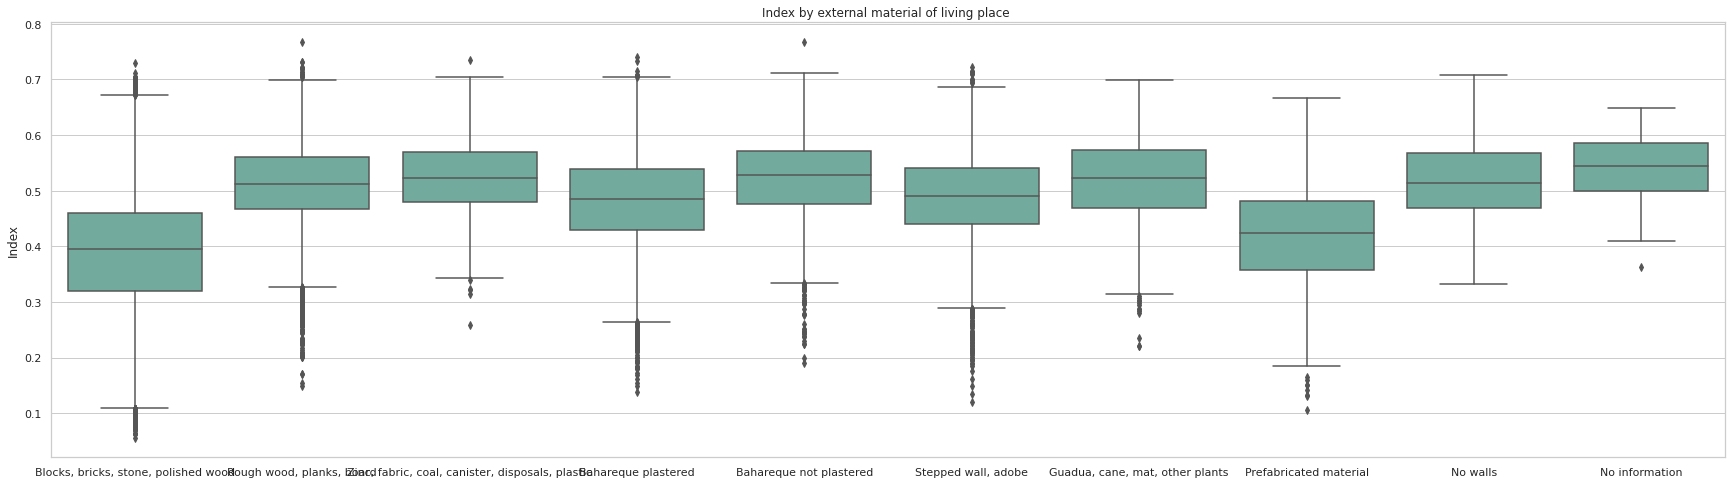

In [147]:
plt.figure(figsize=(30, 8))
g = sns.boxplot(x="P4005",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by external material of living place ")
plt.xlabel(None)
plt.ylabel("Index")

## Living Place's Floor Material

In [148]:
pg.anova(data=merge, dv='indice', between='P4015', detailed=True)

Source           SS      DF          MS             F  p-unc       np2
0   P4015   716.484856       6  119.414143  16224.864209    0.0  0.387638
1  Within  1131.849469  153785    0.007360           NaN    NaN       NaN

In [149]:
x = merge["P4015"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.388
Model:                            WLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                 1.622e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:45   Log-Likelihood:             1.5947e+05
No. Observations:              153792   AIC:                        -3.189e+05
Df Residuals:                  153785   BIC:                        -3.189e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Cement, gravel                             0.4606      0.000   1298.905      0.000       0.460       0.461
Dirt, sand                                 0.5263      0.001    744.167      0.000       0.525       0.528
Marble                                     0.2713      0.004     69.871      0.000       0.264       0.279
Polished and lacquered wood, parketry      0.3443      0.002    145.860      0.000       0.340       0.349
Rough wood, plank, board, other plants     0.4884      0.001    553.125      0.000       0.487       0.490
Rug or carpet from wall to wall            0.3353      0.005     68.261      0.000       0.326       0.345
Tile, vinyl, tablet, brick, laminate       0.3445      0.000   1054.771      0.000       0.344       0.345
==============================================================================
Omnibus:                      425.610   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.561
Skew:                          -0.123   Prob(JB):                     1.94e-94
Kurtosis:                       3.081   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

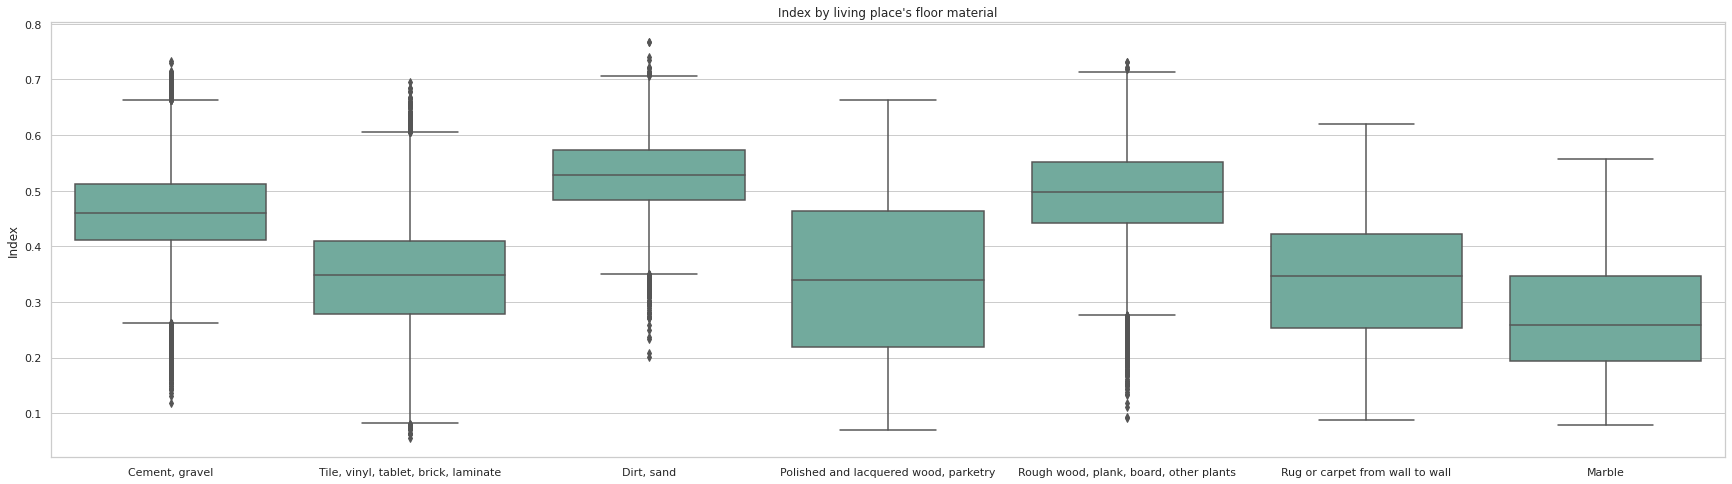

In [150]:
plt.figure(figsize=(30, 8))
g = sns.boxplot(x="P4015",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by living place's floor material")
plt.xlabel(None)
plt.ylabel("Index")

## Material of the Roof

In [151]:
pg.anova(data=merge, dv='indice', between='P4567', detailed=True)

Source           SS      DF         MS            F  p-unc       np2
0   P4567   506.602069       6  84.433678  9677.514368    0.0  0.274086
1  Within  1341.732256  153785   0.008725          NaN    NaN       NaN

In [152]:
x = merge["P4567"]
x = pd.get_dummies(x)
y = merge["indice"]

lm = sm.WLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 indice   R-squared:                       0.274
Model:                            WLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     9678.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:56:46   Log-Likelihood:             1.4639e+05
No. Observations:              153792   AIC:                        -2.928e+05
Df Residuals:                  153785   BIC:                        -2.927e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Asbestos-cement tile                                          0.3994      0.000    916.486      0.000       0.399       0.400
Clay roof tiles                                               0.4026      0.001    505.051      0.000       0.401       0.404
Concrete, cement or concrete plate                            0.3121      0.001    546.350      0.000       0.311       0.313
Metal tile or zinc sheet                                      0.4649      0.000   1245.362      0.000       0.464       0.466
Plastic tile                                                  0.4006      0.004    109.089      0.000       0.393       0.408
Straw, palm or other plants                                   0.5309      0.002    351.941      0.000       0.528       0.534
Waste material (fabric, cardboard, cans, plastic, others)     0.5071      0.005     93.407      0.000       0.496       0.518
==============================================================================
Omnibus:                     1133.917   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1159.059
Skew:                          -0.213   Prob(JB):                    2.06e-252
Kurtosis:                       3.011   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Index')

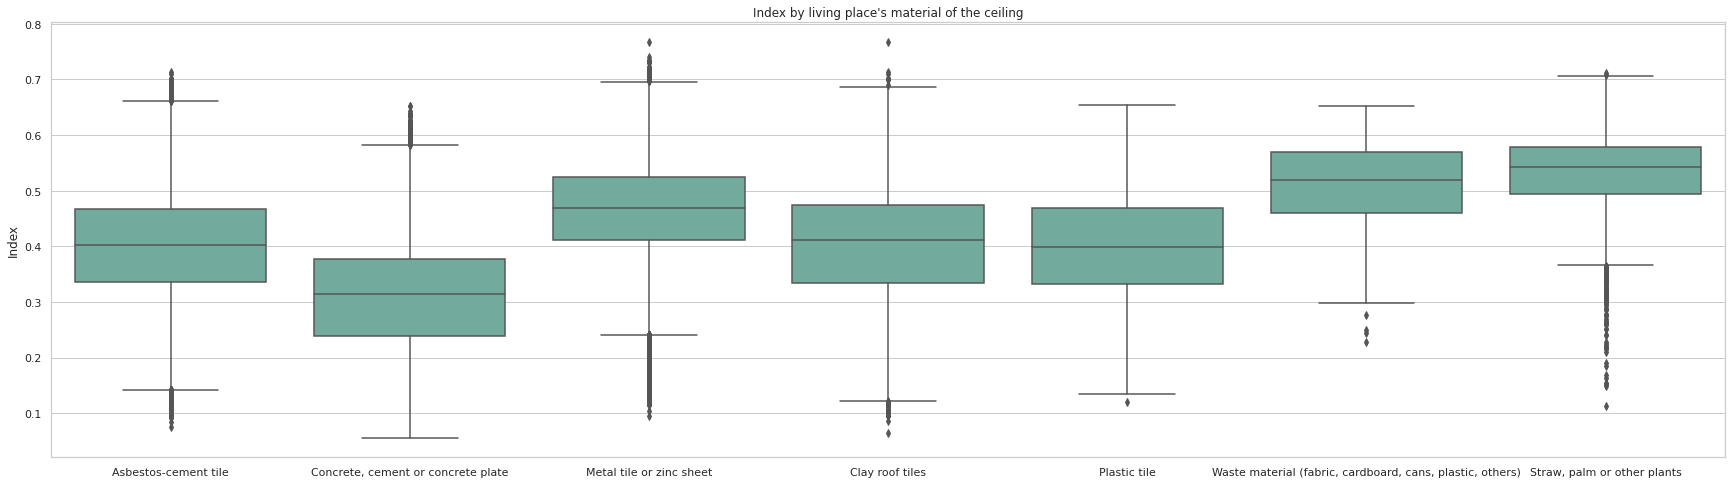

In [153]:
plt.figure(figsize=(30, 8))
g = sns.boxplot(x="P4567",  y="indice", data=merge, color='#69b3a2')
plt.title("Index by living place's material of the ceiling")
plt.xlabel(None)
plt.ylabel("Index")

# Mapa

In [154]:
import json
from urllib.request import urlopen
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    counties = json.load(response)

In [155]:
merge.P1_DEPARTAMENTO=merge.P1_DEPARTAMENTO.astype(float).astype(int).astype(str).str.zfill(2)

In [156]:
#counties
Dptos=merge[["YEAR","P1_DEPARTAMENTO","indice"]].groupby(["YEAR","P1_DEPARTAMENTO"]).mean().reset_index() # 

In [157]:
locs = Dptos[Dptos["YEAR"]==2018]['P1_DEPARTAMENTO']
for loc in counties['features']:
    loc['id'] = loc['properties']['DPTO']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=Dptos[Dptos["YEAR"]==2018]['indice'],
                    colorscale='Viridis',
                    colorbar_title="Indice 2018"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [158]:
locs = Dptos[Dptos["YEAR"]==2019]['P1_DEPARTAMENTO']

for loc in counties['features']:
    loc['id'] = loc['properties']['DPTO']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=Dptos[Dptos["YEAR"]==2019]['indice'],
                    colorscale='Viridis',
                    colorbar_title="Indice 2019"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [159]:
locs = Dptos[Dptos["YEAR"]==2020]['P1_DEPARTAMENTO']

for loc in counties['features']:
    loc['id'] = loc['properties']['DPTO']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=Dptos[Dptos["YEAR"]==2020]['indice'],
                    colorscale='Viridis',
                    colorbar_title="Index 2019"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [160]:
locs = Dptos[Dptos["YEAR"]==2021]['P1_DEPARTAMENTO']

for loc in counties['features']:
    loc['id'] = loc['properties']['DPTO']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=Dptos[Dptos["YEAR"]==2021]['indice'],
                    colorscale='Viridis',
                    colorbar_title="Indice 2019"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

# Export MERGE_FINAL_YEARS.csv

# Nueva sección

In [161]:
# merge = merge.rename(columns={"indice": "Index"})
# merge.to_csv('/content/gdrive/MyDrive/DS4A Project - Team 148/Proyecto/MERGE_FINAL_YEARS.csv')